# __Importing Libraries__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# __1. Data Wrangling__

## Loading the dataset

In [9]:
# Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('AusApparalSales4thQrt2020.csv')
print(df.head())

Saving AusApparalSales4thQrt2020.csv to AusApparalSales4thQrt2020.csv
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


## Check dataframe structure, data types, columns and summary stats

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [11]:
df.describe()

Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000

### Change the datatype of Date from 'Object' to 'datetime' format

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object


## _a. Check for Missing Values_

In [15]:
df.isna().sum() # missing values check
df.notna().sum() # non-missing values check

print('Missing Values in each column:\n', df.isna().sum())
print('\nNon-Missing Values in each column:\n', df.notna().sum())

Missing Values in each column:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Non-Missing Values in each column:
 Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


**Initial Check:**

There are no missing values in the dataset

## _b. Recommendations on Handling Missing Values_

- Even though no missing values were found in the dataset, understanding the missingness of the value is crucial before attempting to drop or fill them.

- Let's format the data for further analysis

In [17]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [20]:
# filter data for the 4th qtr (October to December)
fourth_quarter_df = df[(df['Date'] >= '2020-10-01') & (df['Date'] <= '2020-12-31')]

# get all unique values from State column
unique_states = fourth_quarter_df['State'].unique()

# print the unique states
print('Unique States in fourth quarter:\n', unique_states)
print('\nFourth Quarter:\n',fourth_quarter_df.head())

Unique States in fourth quarter:
 [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']

Fourth Quarter:
         Date        Time State     Group  Unit  Sales
0 2020-10-01     Morning    WA      Kids     8  20000
1 2020-10-01     Morning    WA       Men     8  20000
2 2020-10-01     Morning    WA     Women     4  10000
3 2020-10-01     Morning    WA   Seniors    15  37500
4 2020-10-01   Afternoon    WA      Kids     3   7500


## _c. Normalization Approach_

- I will normalize the sales data using min-max normalization to scale the values between 0 and 1.

In [21]:
# find the min and max sales values
min_sales = fourth_quarter_df['Sales'].min()
max_sales = fourth_quarter_df['Sales'].max()

# apply min-max normalization to the Sales column
fourth_quarter_df['Normalized_Sales'] = (fourth_quarter_df['Sales'] - min_sales) / (max_sales - min_sales)

# print the column names and their data types
print(fourth_quarter_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7560 non-null   datetime64[ns]
 1   Time              7560 non-null   object        
 2   State             7560 non-null   object        
 3   Group             7560 non-null   object        
 4   Unit              7560 non-null   int64         
 5   Sales             7560 non-null   int64         
 6   Normalized_Sales  7560 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 413.6+ KB
None


- Number of columns changed from 6 to 7 as we added the Normalized_Sales column.

- We are using more memory than before; from 354.5 kb to 413.6 kb.

- Let's optimize our dataset

In [24]:
# optimizing the dataset
fourth_quarter_df['Unit'] = fourth_quarter_df['Unit'].astype(np.int8)
fourth_quarter_df['Sales'] = fourth_quarter_df['Sales'].astype(np.float32)
fourth_quarter_df['Normalized_Sales'] = fourth_quarter_df['Normalized_Sales'].astype(np.float16)

print("\nOptimized dtypes and memory usage:")
print(fourth_quarter_df.dtypes)


Optimized dtypes and memory usage:
Date                datetime64[ns]
Time                        object
State                       object
Group                       object
Unit                          int8
Sales                      float32
Normalized_Sales           float16
dtype: object


In [26]:
# check the memory usage
fourth_quarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7560 non-null   datetime64[ns]
 1   Time              7560 non-null   object        
 2   State             7560 non-null   object        
 3   Group             7560 non-null   object        
 4   Unit              7560 non-null   int8          
 5   Sales             7560 non-null   float32       
 6   Normalized_Sales  7560 non-null   float16       
dtypes: datetime64[ns](1), float16(1), float32(1), int8(1), object(3)
memory usage: 288.1+ KB


## _d. Insights on the GroupBy Function_

- For the analysis of the apparel sales data, __.groupby()__ is highly recommended for chunking the data to gain state-specific insights. For example, it can be used to:
  - Calculate total sales, average units sold, or other relevant metrics for each state.
  - Identify trends in sales performance across different states.
  - Compare the performance of different groups (e.g., Kids, Men, Women, Seniors) within each state.

- Using __.groupby()__ will provide a structured and efficient way to analyze the sales data, enabling data-driven decisions for the upcoming year.

# __Data Analysis__

## _a. Performing Descriptive Statistical Analysis for Sales and Unit Columns_

In [27]:
# Calculate mean, median, mode, and standard deviation for 'Sales'
sales_mean = fourth_quarter_df['Sales'].mean()
sales_median = fourth_quarter_df['Sales'].median()
sales_mode = fourth_quarter_df['Sales'].mode().round(2)
sales_std = fourth_quarter_df['Sales'].std()

# Calculate mean, median, mode, and standard deviation for 'Unit'
unit_mean = fourth_quarter_df['Unit'].mean()
unit_median = fourth_quarter_df['Unit'].median()
unit_mode = fourth_quarter_df['Unit'].mode().round(2)
unit_std = fourth_quarter_df['Unit'].std()

# Display the results for 'Sales'
print("Sales Descriptive Statistics:\n")
print(f"Mean: {sales_mean:.2f}")
print(f"Median: {sales_median:.2f}")
print(f"Standard Deviation: {sales_std:.2f}\n")

# Display the results for 'Unit'
print("Unit Descriptive Statistics:\n")
print(f"Mean: {unit_mean:.2f}")
print(f"Median: {unit_median:.2f}")
print(f"Standard Deviation: {unit_std:.2f}")

Sales Descriptive Statistics:

Mean: 45013.56
Median: 35000.00
Standard Deviation: 32253.60

Unit Descriptive Statistics:

Mean: 18.01
Median: 14.00
Standard Deviation: 12.90


__Insights__

**Sales**:

- The mean sales value is 45,013.56, while the median is 35,000, indicating that the sales data is likely right-skewed. This suggests that there are some high sales values pulling the average up.
- The mode is 22,500, which is the most frequent sales value.
- The standard deviation of 32,253.51 shows a fair amount of variability in sales, meaning the sales values are quite spread out from the mean.

**Unit**:

- The mean number of units sold is 18.01, and the median is 14, also suggesting a right-skewed distribution. This implies that most transactions involve a smaller number of units, with fewer transactions involving a large number of units.
- The mode is 9, indicating that the most frequent number of units sold in a transaction is 9.
- The standard deviation of 12.90 indicates a moderate spread in the number of units sold per transaction.

## _b. Highest and Lowest Sales by Group_

In [28]:
# group by 'Group' and sum the 'Sales'
group_sales = fourth_quarter_df.groupby('Group')['Sales'].sum().reset_index()

# Sort by sales in descending order to get the highest sales
highest_sales_group = group_sales.sort_values(by='Sales', ascending=False).iloc[0]

# Sort by sales in ascending order to get the lowest sales
lowest_sales_group = group_sales.sort_values(by='Sales', ascending=True).iloc[0]

# Display the group with the highest sales
print("Group with Highest Sales: \n")
print(highest_sales_group)

# Display the group with the lowest sales
print("\nGroup with Lowest Sales:\n")
print(lowest_sales_group)

Group with Highest Sales: 

Group           Men
Sales    85750000.0
Name: 1, dtype: object

Group with Lowest Sales:

Group       Seniors
Sales    84037504.0
Name: 2, dtype: object


## _c. Identify The Group With The Highest and Lowest Sales_

__Insights from question b__

- The group with the highest sales for the fourth quater is Men, approzimately 85.8M

- The group with the lowest fourth quarter sales is Seniors, approximately 84M

## _d. Generating Report to Present Analysis_

In [29]:
# Adding the Week, Month, and Quarter columns
fourth_quarter_df['Week'] = fourth_quarter_df['Date'].dt.isocalendar().week
fourth_quarter_df['Month'] = fourth_quarter_df['Date'].dt.month
fourth_quarter_df['Quarter'] = fourth_quarter_df['Date'].dt.quarter

# Placeholder function for weekly top state and group (requires more detailed analysis)
def get_top_state_group_weekly(weekly_df):
    # This is a placeholder. Actual implementation would require further aggregation
    # and sorting within the weekly_df to find the top state and group.
    if not weekly_df.empty:
        top_state = weekly_df['State'].iloc[0]  # Replace with actual top state logic
        top_group = weekly_df['Group'].iloc[0]  # Replace with actual top group logic
    else:
        top_state = "N/A"
        top_group = "N/A"
    return pd.Series({'Top Performing State': top_state, 'Top Performing Group': top_group})

# Weekly report
weekly_report = fourth_quarter_df.groupby(fourth_quarter_df['Date'].dt.to_period('W')).agg(
    Total_Sales=('Sales', 'sum')
)

weekly_top = fourth_quarter_df.groupby(fourth_quarter_df['Date'].dt.to_period('W')).apply(get_top_state_group_weekly)
weekly_report = pd.concat([weekly_report, weekly_top], axis=1).reset_index().rename(columns={'Date': 'Week Commencing'})

# Monthly Report
monthly_report = fourth_quarter_df.groupby('Month').agg(
    Total_Sales=('Sales', 'sum'),
    Top_Performing_State=('State', lambda x: x.value_counts().idxmax()),
    Top_Performing_Group=('Group', lambda x: x.value_counts().idxmax())
).reset_index()

# Quarterly Report
quarterly_report = fourth_quarter_df.groupby('Quarter').agg(
    Total_Sales=('Sales', 'sum'),
    Top_Performing_State=('State', lambda x: x.value_counts().idxmax()),
    Top_Performing_Group=('Group', lambda x: x.value_counts().idxmax()),
    Lowest_Performing_State=('State', lambda x: x.value_counts().idxmin()),
    Lowest_Performing_Group=('Group', lambda x: x.value_counts().idxmin())
).reset_index()

### __Weekly Report__

In [30]:
# Extract the week of the year from Date column
fourth_quarter_df['Week_of_Year'] = fourth_quarter_df['Date'].dt.isocalendar().week

# -- Weekly Report --
weekly_sales = fourth_quarter_df.groupby('Week_of_Year')['Sales'].sum().reset_index()

# Find the top-performing state for each week
top_state_weekly = fourth_quarter_df.groupby('Week_of_Year', as_index=False)[['Week_of_Year', 'State', 'Sales']].apply(lambda x: x.nlargest(1, 'Sales')).reset_index(level=0, drop=True).rename(columns={'State': 'Top Performing State'})

# Find the top-performing group for each week
top_group_weekly = fourth_quarter_df.groupby('Week_of_Year', as_index=False)[['Week_of_Year', 'Group', 'Sales']].apply(lambda x: x.nlargest(1, 'Sales')).reset_index(level=0, drop=True).rename(columns={'Group': 'Top Performing Group'})

# Merge the weekly sales and top-performing entities
weekly_report = pd.merge(weekly_sales, top_state_weekly[['Week_of_Year', 'Top Performing State']], on='Week_of_Year')
weekly_report = pd.merge(weekly_report, top_group_weekly[['Week_of_Year', 'Top Performing Group']], on='Week_of_Year')


# Display the Weekly Report
print("Weekly Report:\n", weekly_report)

Weekly Report:
     Week_of_Year       Sales Top Performing State Top Performing Group
0             40  15045000.0                  VIC                Women
1             41  27002500.0                  VIC                 Kids
2             42  26640000.0                  VIC                Women
3             43  26815000.0                  VIC                  Men
4             44  21807500.0                  VIC                  Men
5             45  20865000.0                  VIC                 Kids
6             46  21172500.0                  VIC                 Kids
7             47  21112500.0                  VIC                Women
8             48  21477500.0                  VIC                  Men
9             49  29622500.0                  VIC              Seniors
10            50  31525000.0                  VIC              Seniors
11            51  31655000.0                  VIC                Women
12            52  31770000.0                  VIC            

### __Monthly Report__

In [31]:
# -- Monthly Report --
# Group by the actual datetime 'Date' and then extract month for labeling
monthly_sales = fourth_quarter_df.groupby(fourth_quarter_df['Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Date'].astype(str)  # Keep 'Date' as Period and then convert to string

# Find the top-performing state for each month
top_state_monthly = fourth_quarter_df.groupby(fourth_quarter_df['Date'].dt.to_period('M'), as_index=False)[['Date', 'State', 'Sales']].apply(lambda x: x.nlargest(1, 'Sales')).reset_index(level=0, drop=True).rename(columns={'State': 'Top Performing State'})

# Find the top-performing group for each month
top_group_monthly = fourth_quarter_df.groupby(fourth_quarter_df['Date'].dt.to_period('M'), as_index=False)[['Date', 'Group', 'Sales']].apply(lambda x: x.nlargest(1, 'Sales')).reset_index(level=0, drop=True).rename(columns={'Group': 'Top Performing Group'})

# Ensure the 'Date' column in all DataFrames is of the same type (convert to string for consistency)
monthly_sales['Date'] = monthly_sales['Date'].astype(str)
top_state_monthly['Date'] = top_state_monthly['Date'].dt.to_period('M').astype(str)
top_group_monthly['Date'] = top_group_monthly['Date'].dt.to_period('M').astype(str)

# Merge the monthly sales and top-performing entities
monthly_report = pd.merge(monthly_sales, top_state_monthly[['Date', 'Top Performing State']], on='Date', how='left')
monthly_report = pd.merge(monthly_report, top_group_monthly[['Date', 'Top Performing Group']], on='Date', how='left')

# Display the Monthly Report
print("\nMonthly Report:\n", monthly_report)


Monthly Report:
       Date        Sales    Month Top Performing State Top Performing Group
0  2020-10  114290000.0  2020-10                  VIC                Women
1  2020-11   90682496.0  2020-11                  VIC                 Kids
2  2020-12  135330000.0  2020-12                  VIC              Seniors


### __Quarterly Report__

In [32]:
# -- Quarterly Report --
quarterly_sales = fourth_quarter_df['Sales'].sum()

# Find the top-performing state for the quarter
top_state_quarterly = fourth_quarter_df.groupby('State')['Sales'].sum().nlargest(1).reset_index().rename(columns={'State': 'Top Performing State'})

# Find the lowest-performing state for the quarter
lowest_state_quarterly = fourth_quarter_df.groupby('State')['Sales'].sum().nsmallest(1).reset_index().rename(columns={'State': 'Lowest Performing State'})

# Find the top-performing group for the quarter
top_group_quarterly = fourth_quarter_df.groupby('Group')['Sales'].sum().nlargest(1).reset_index().rename(columns={'Group': 'Top Performing Group'})

# Find the lowest-performing group for the quarter
lowest_group_quarterly = fourth_quarter_df.groupby('Group')['Sales'].sum().nsmallest(1).reset_index().rename(columns={'Group': 'Lowest Performing Group'})

# Create the quarterly report DataFrame
quarterly_report_data = {
    'Quarter': ['Fourth Quarter'],
    'Total Sales': [quarterly_sales],
    'Top Performing State': [top_state_quarterly['Top Performing State'].values[0]],
    'Lowest Performing State': [lowest_state_quarterly['Lowest Performing State'].values[0]],
    'Top Performing Group': [top_group_quarterly['Top Performing Group'].values[0]],
    'Lowest Performing Group': [lowest_group_quarterly['Lowest Performing Group'].values[0]]
}
quarterly_report = pd.DataFrame(quarterly_report_data)

# Display the Quarterly Report
print("\nQuarterly Report:\n", quarterly_report)


Quarterly Report:
           Quarter  Total Sales Top Performing State Lowest Performing State  \
0  Fourth Quarter  340302496.0                  VIC                      WA   

  Top Performing Group Lowest Performing Group  
0                  Men                 Seniors  


# __3. Data Visualization__

### __State-wise Sales by Demographic Group__

In [40]:
# Group the data by State and Group and calculate the sum of Sales
state_group_sales = fourth_quarter_df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Display the first 5 rows
print(state_group_sales.head())

  State     Group       Sales
0   NSW      Kids  18587500.0
1   NSW       Men  19022500.0
2   NSW   Seniors  18187500.0
3   NSW     Women  19172500.0
4    NT      Kids   5700000.0


In [35]:
# Print the column names and their data types
print(state_group_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   28 non-null     object 
 1   Group   28 non-null     object 
 2   Sales   28 non-null     float32
dtypes: float32(1), object(2)
memory usage: 692.0+ bytes
None


#### __Daily Sales__

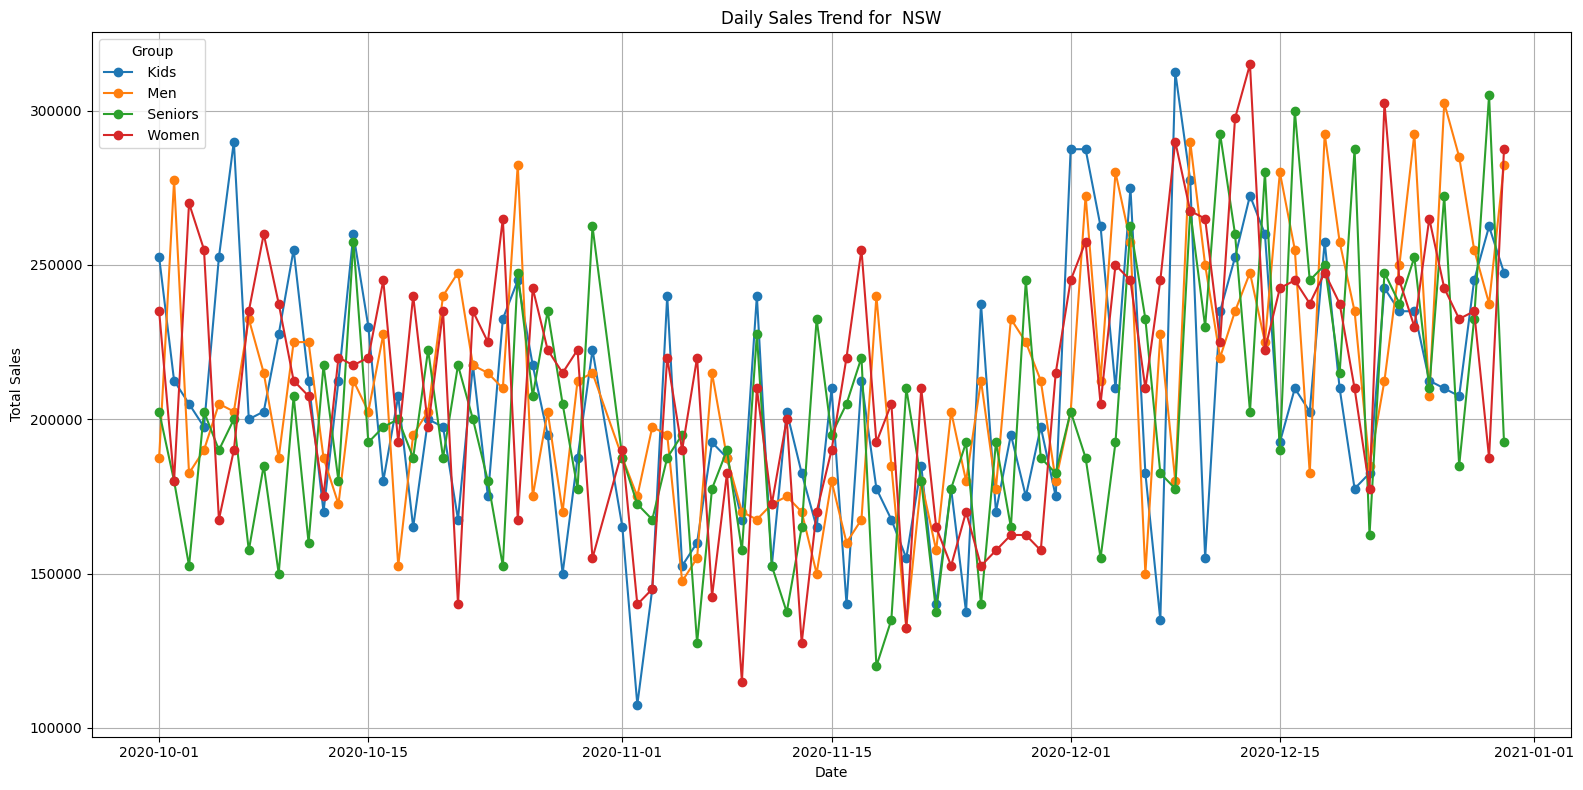

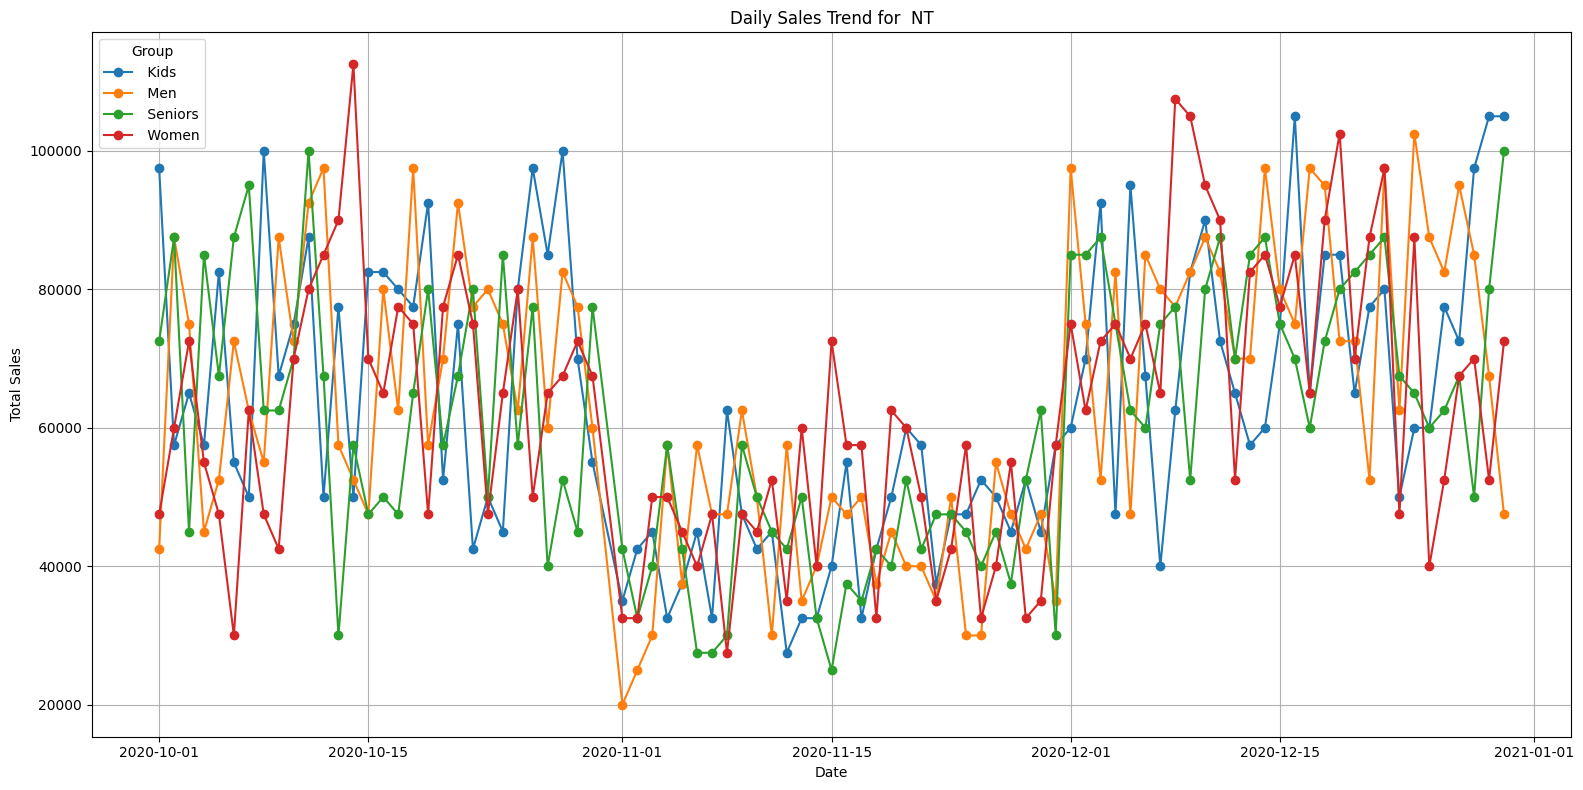

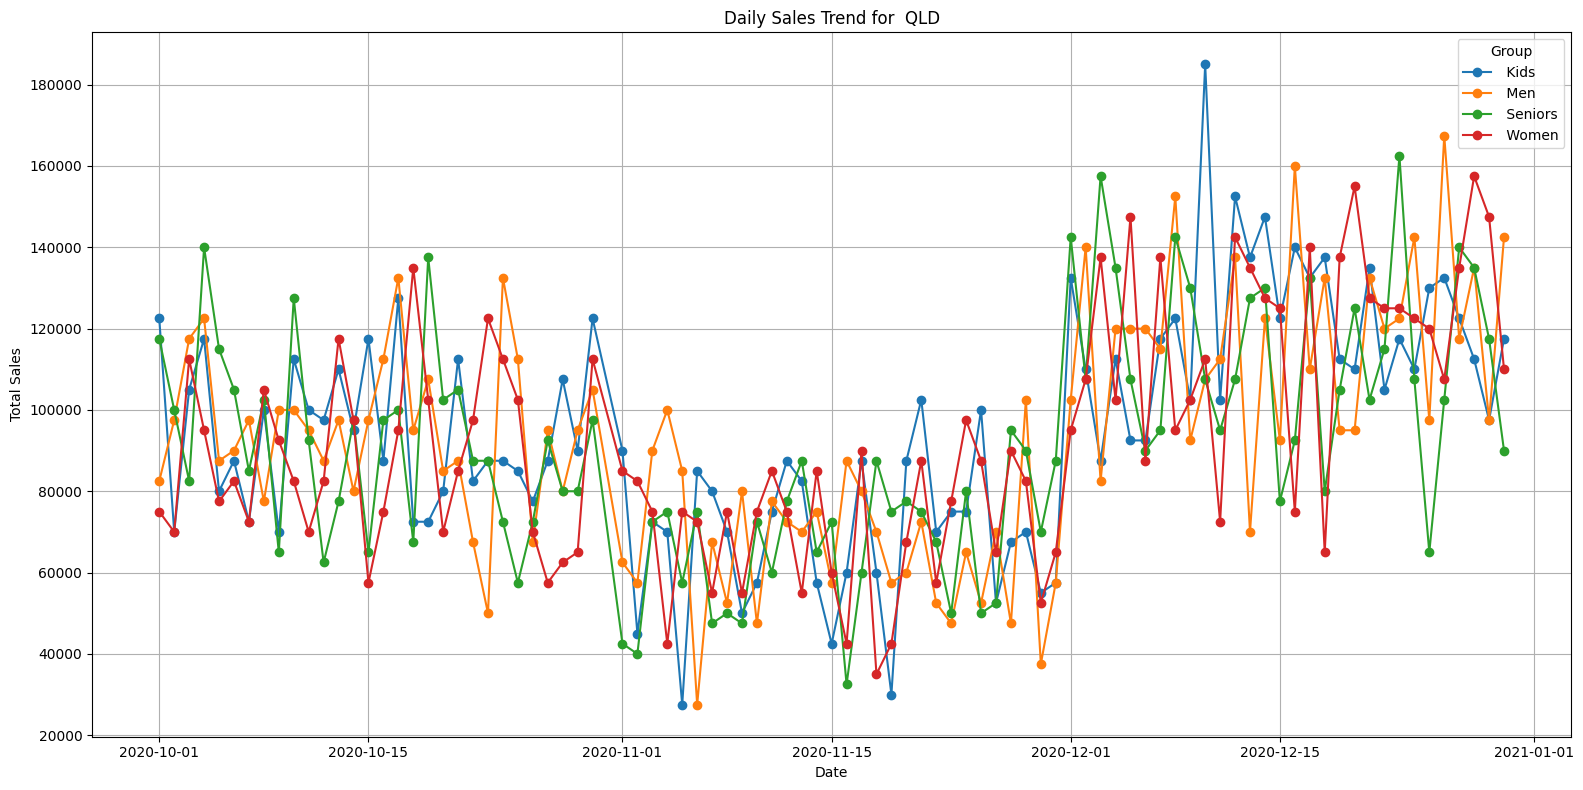

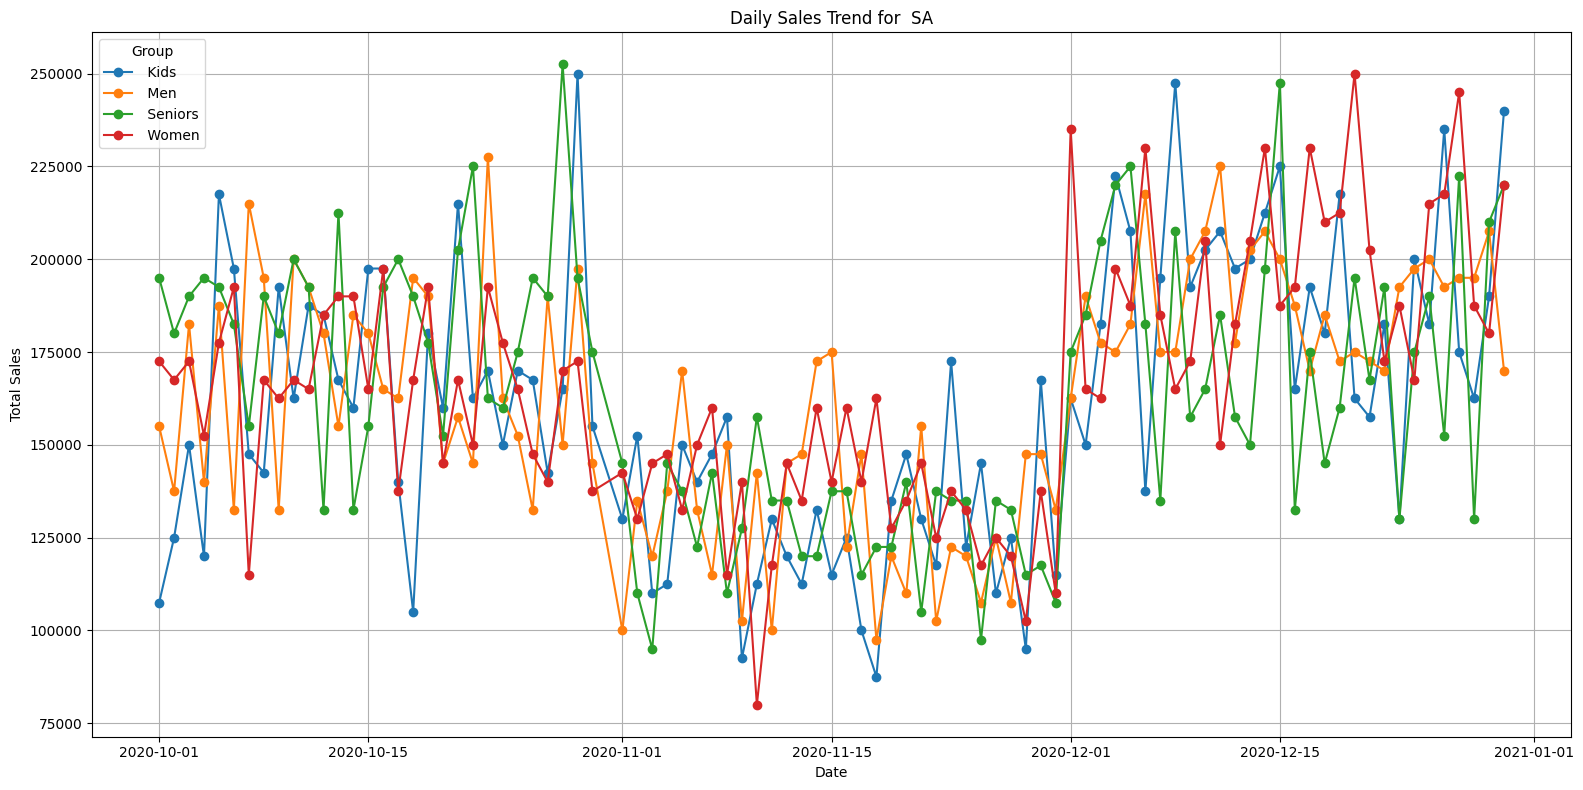

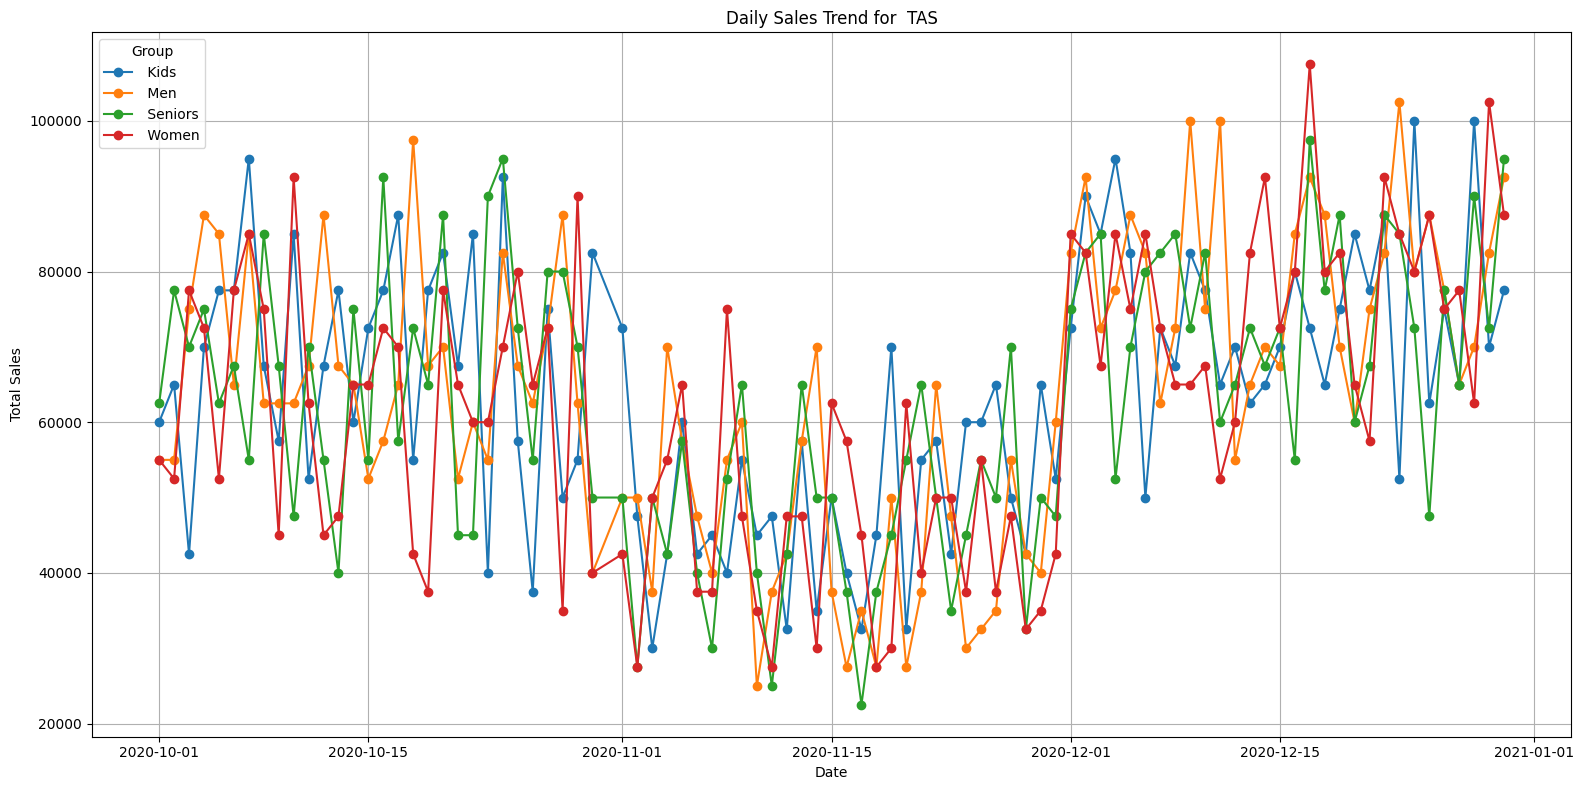

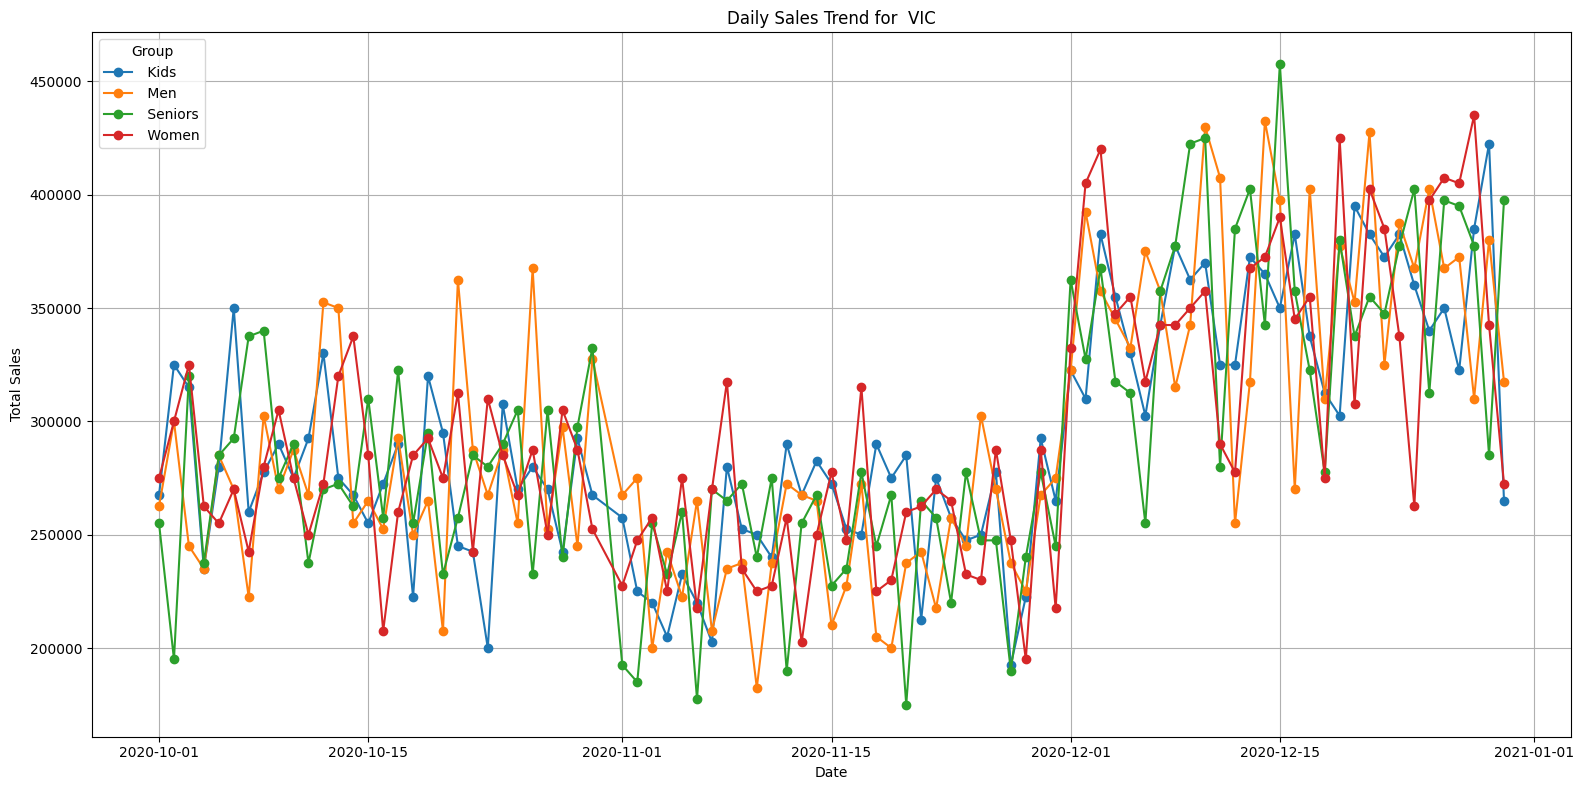

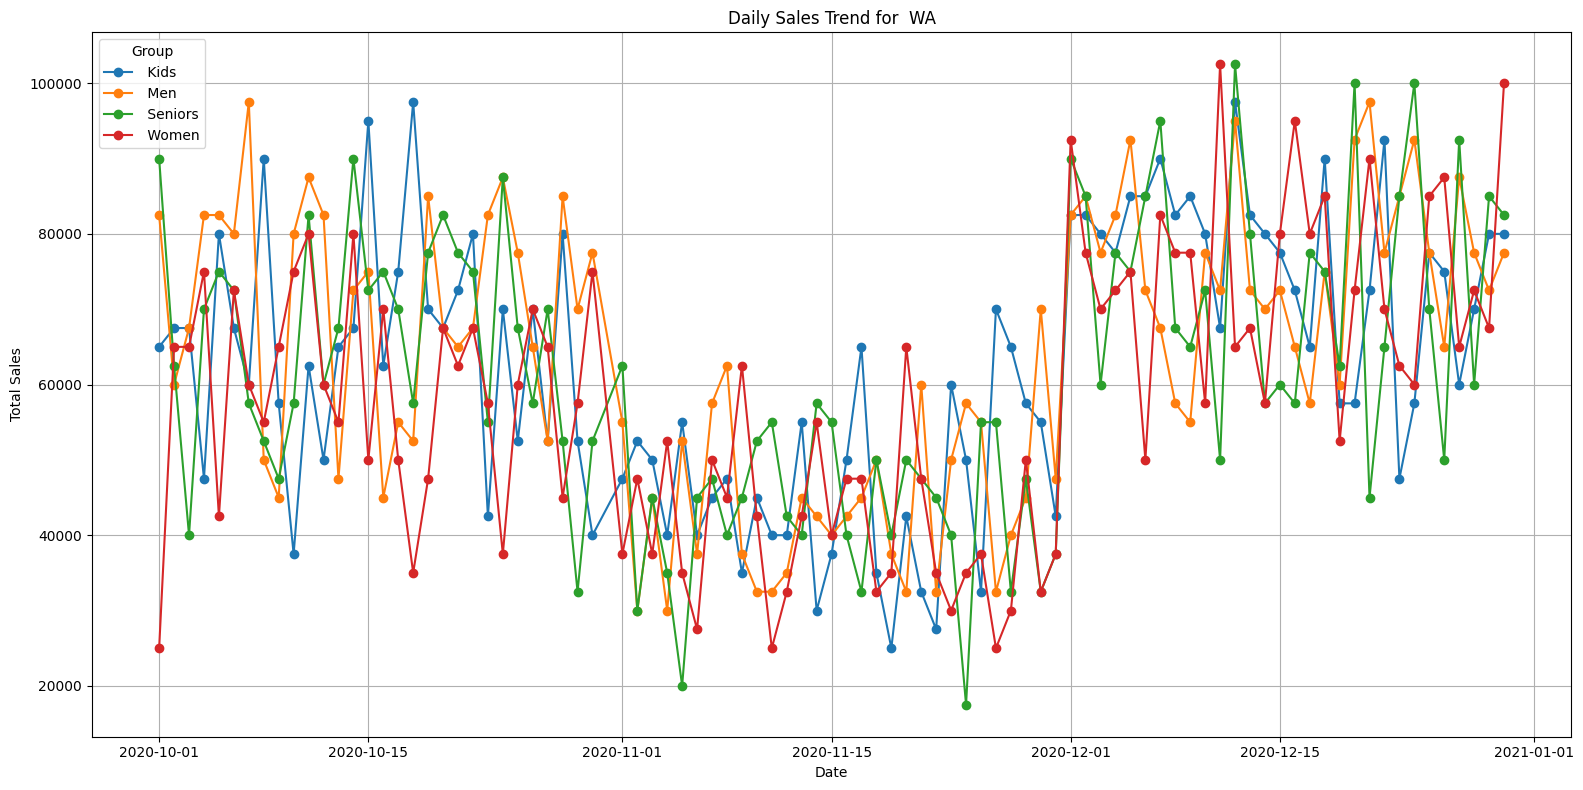

In [36]:
# Group by State, Group, and Date to get daily sales
state_group_daily_sales = fourth_quarter_df.groupby(['State', 'Group', 'Date'])['Sales'].sum().reset_index()

# Get unique states and groups for plotting
states = state_group_daily_sales['State'].unique()
groups = state_group_daily_sales['Group'].unique()

# Create a faceted line plot to show daily sales trends
for state in states:
    plt.figure(figsize=(16, 8))
    state_data = state_group_daily_sales[state_group_daily_sales['State'] == state]
    for group in groups:
        group_data = state_data[state_data['Group'] == group]
        plt.plot(group_data['Date'], group_data['Sales'], marker='o', linestyle='-', label=group)

    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.title(f'Daily Sales Trend for {state}')
    plt.legend(title='Group')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### __Weekly Sales__

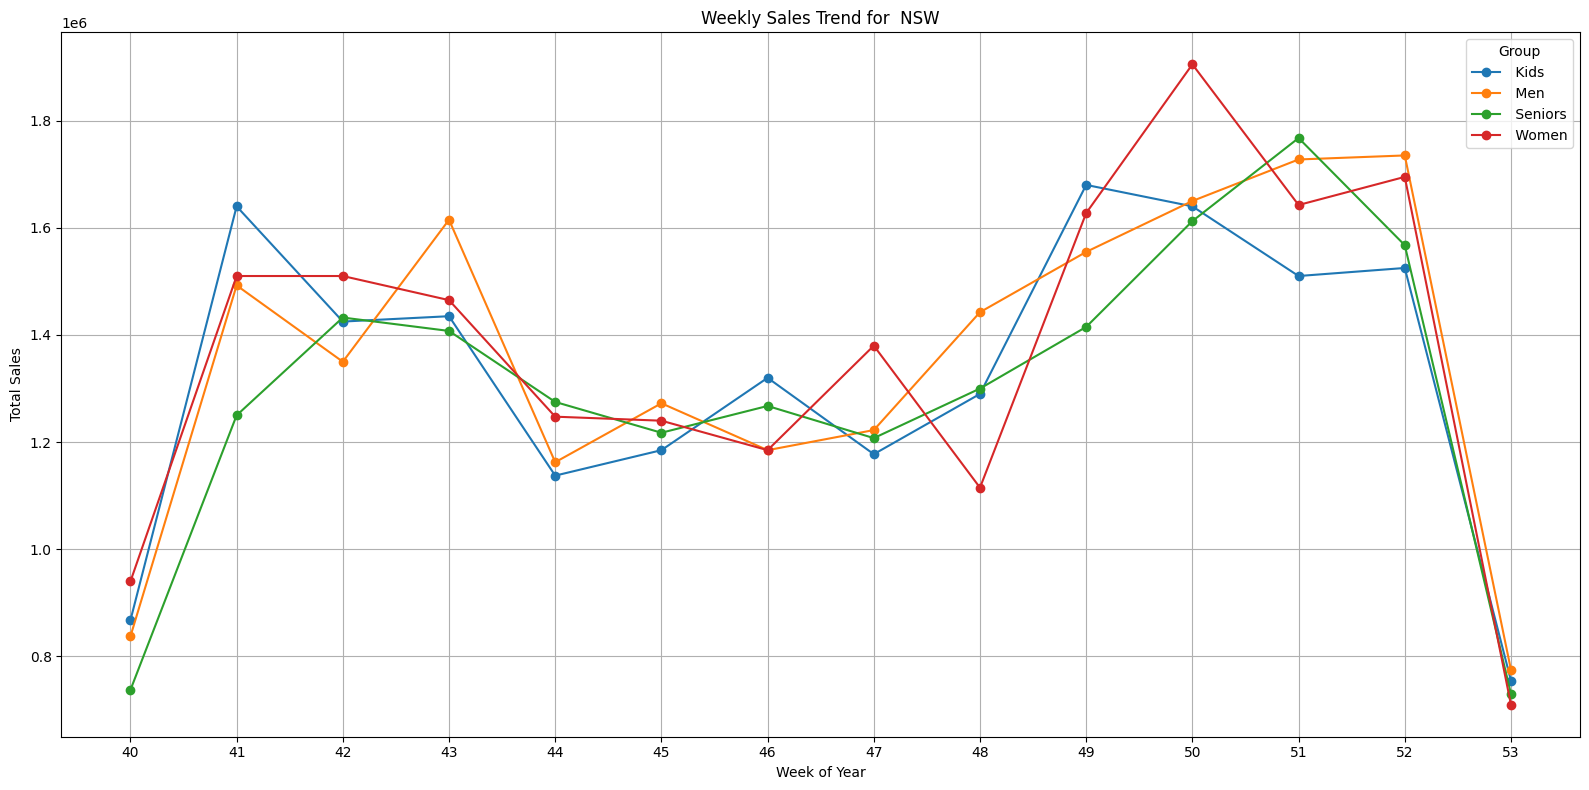

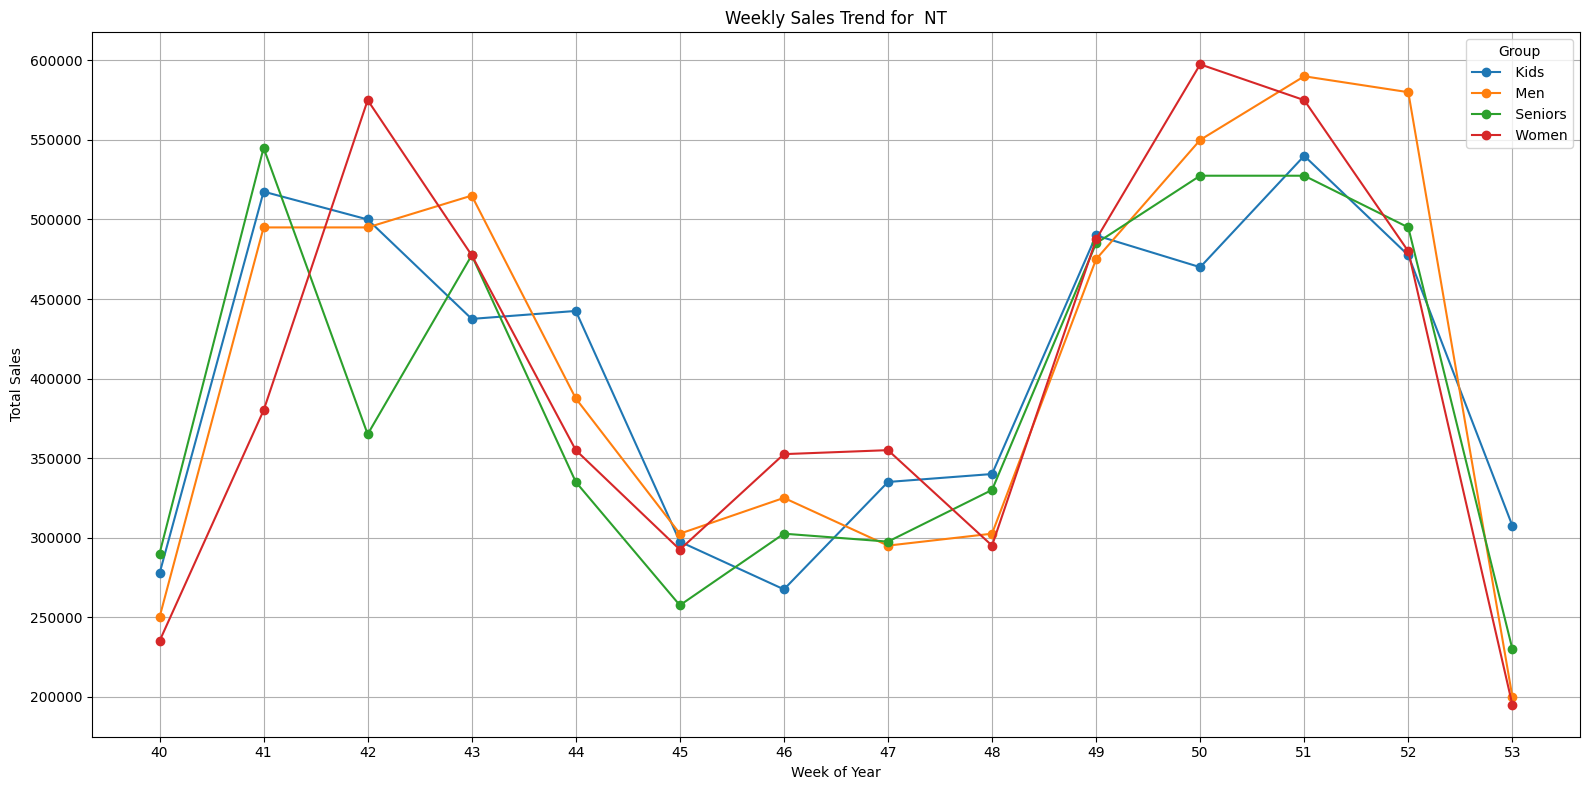

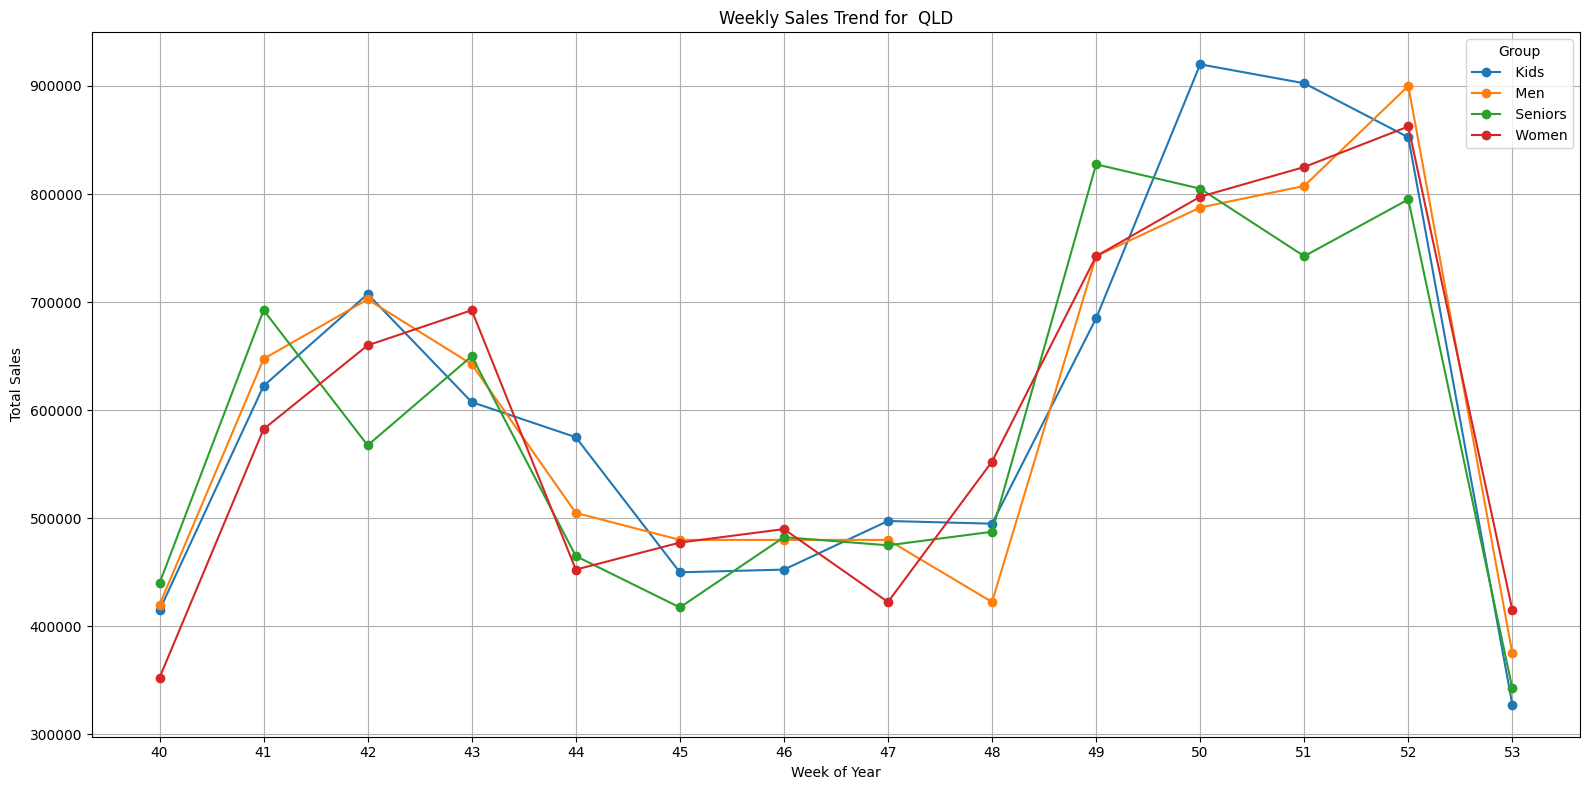

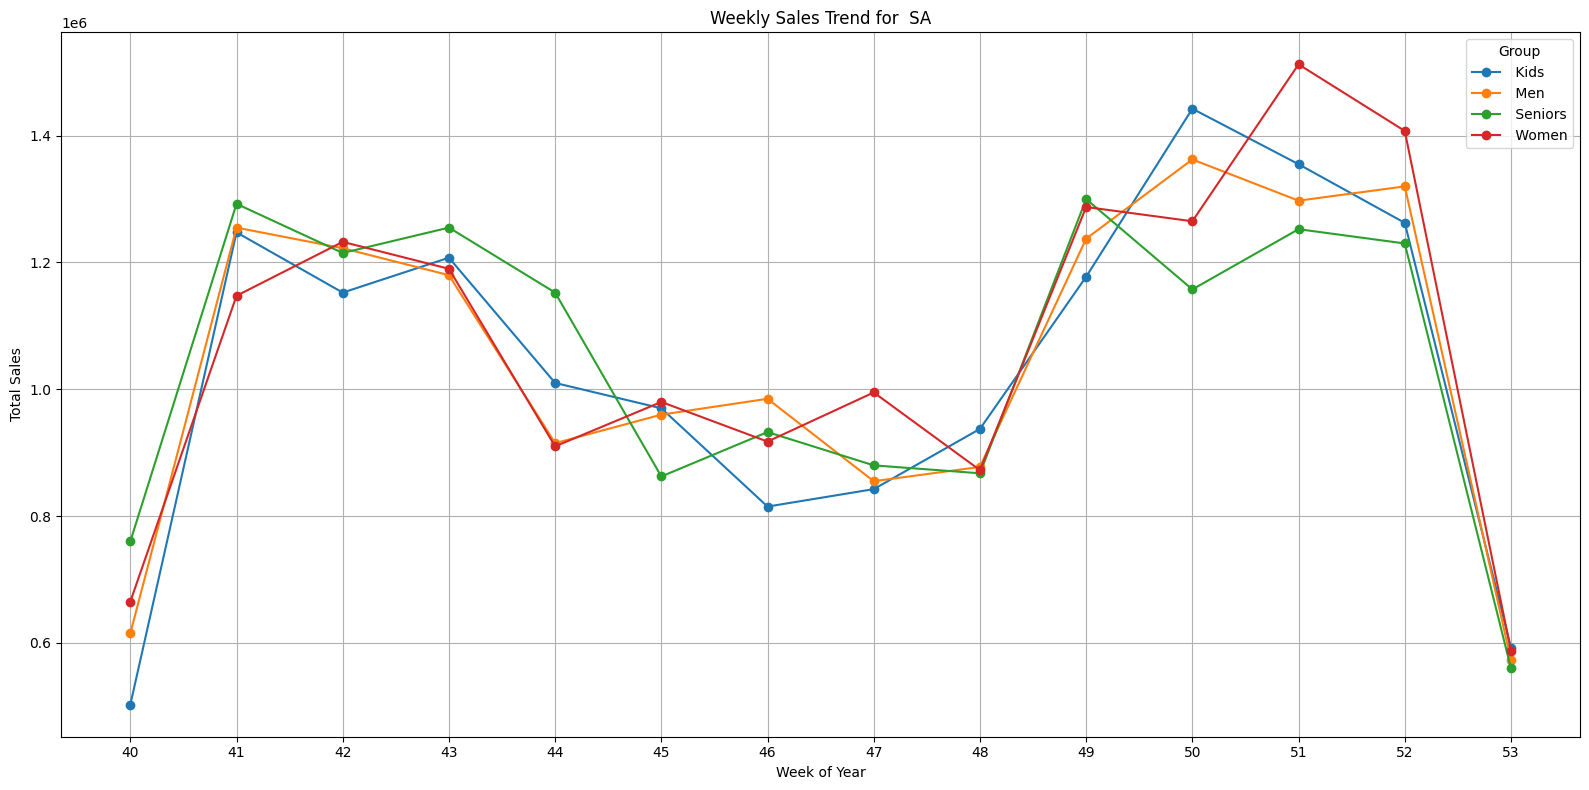

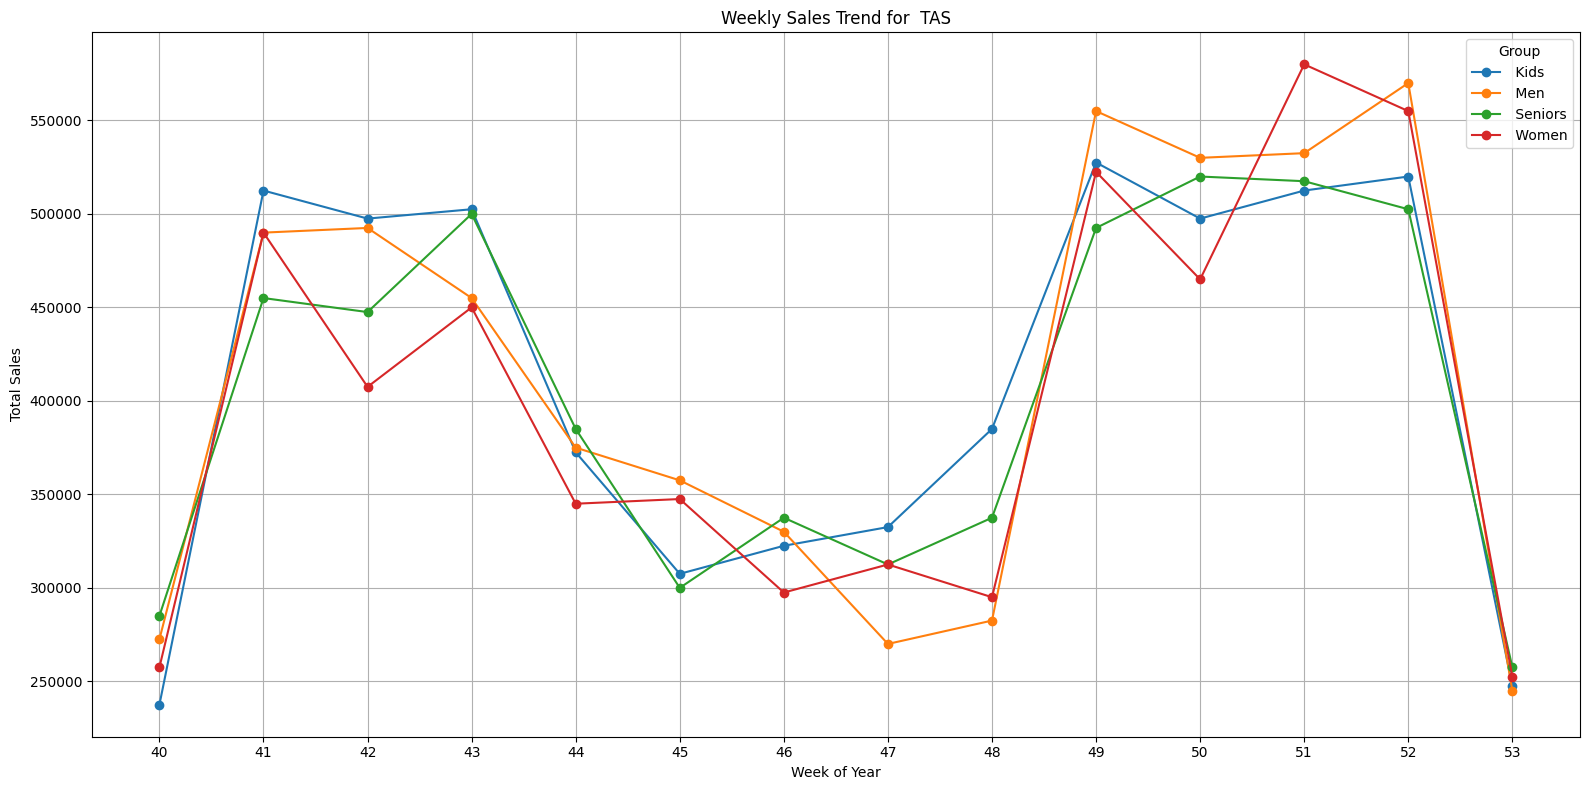

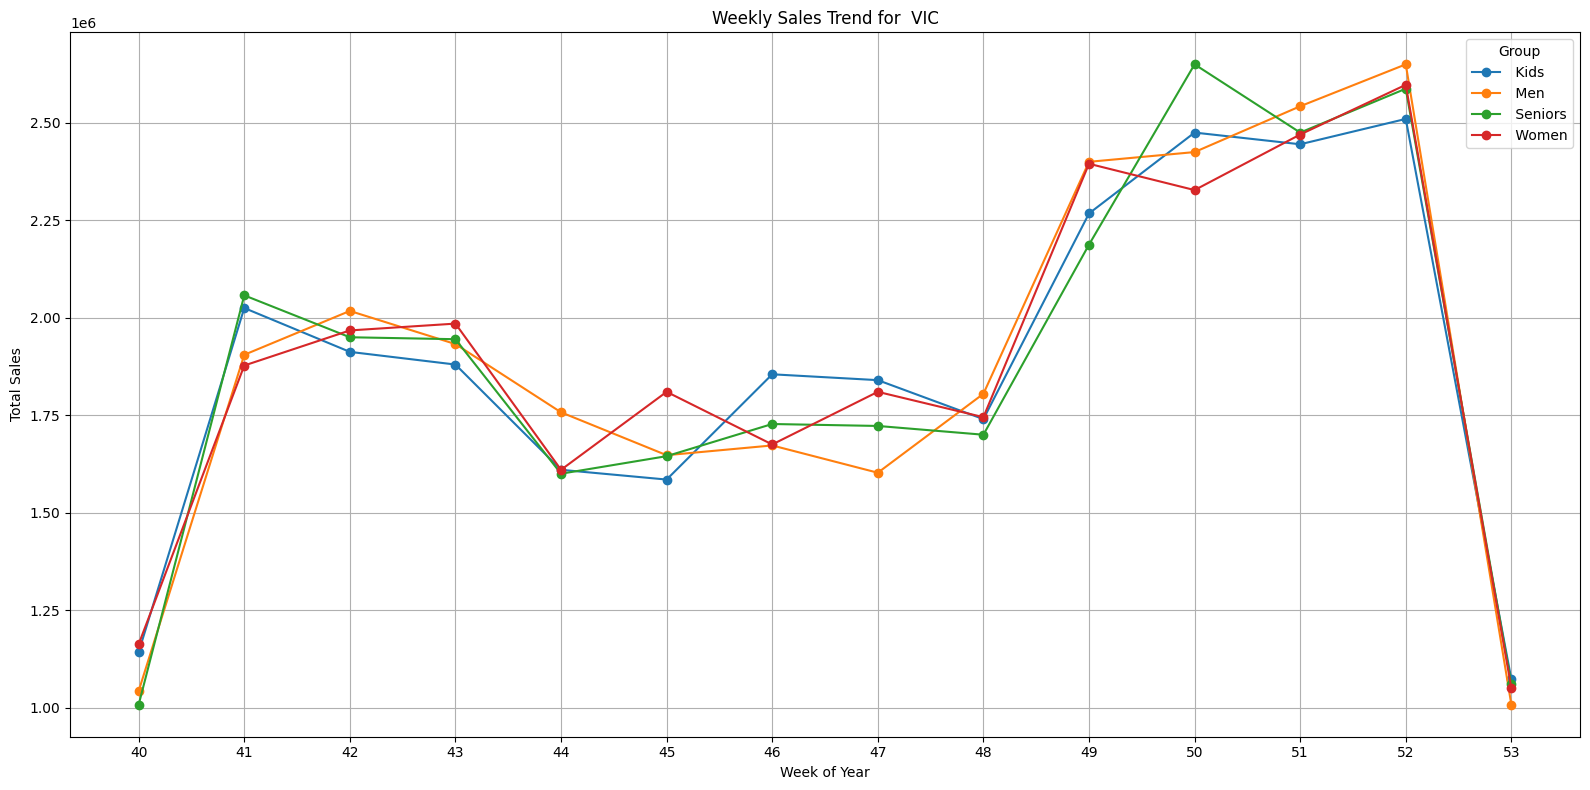

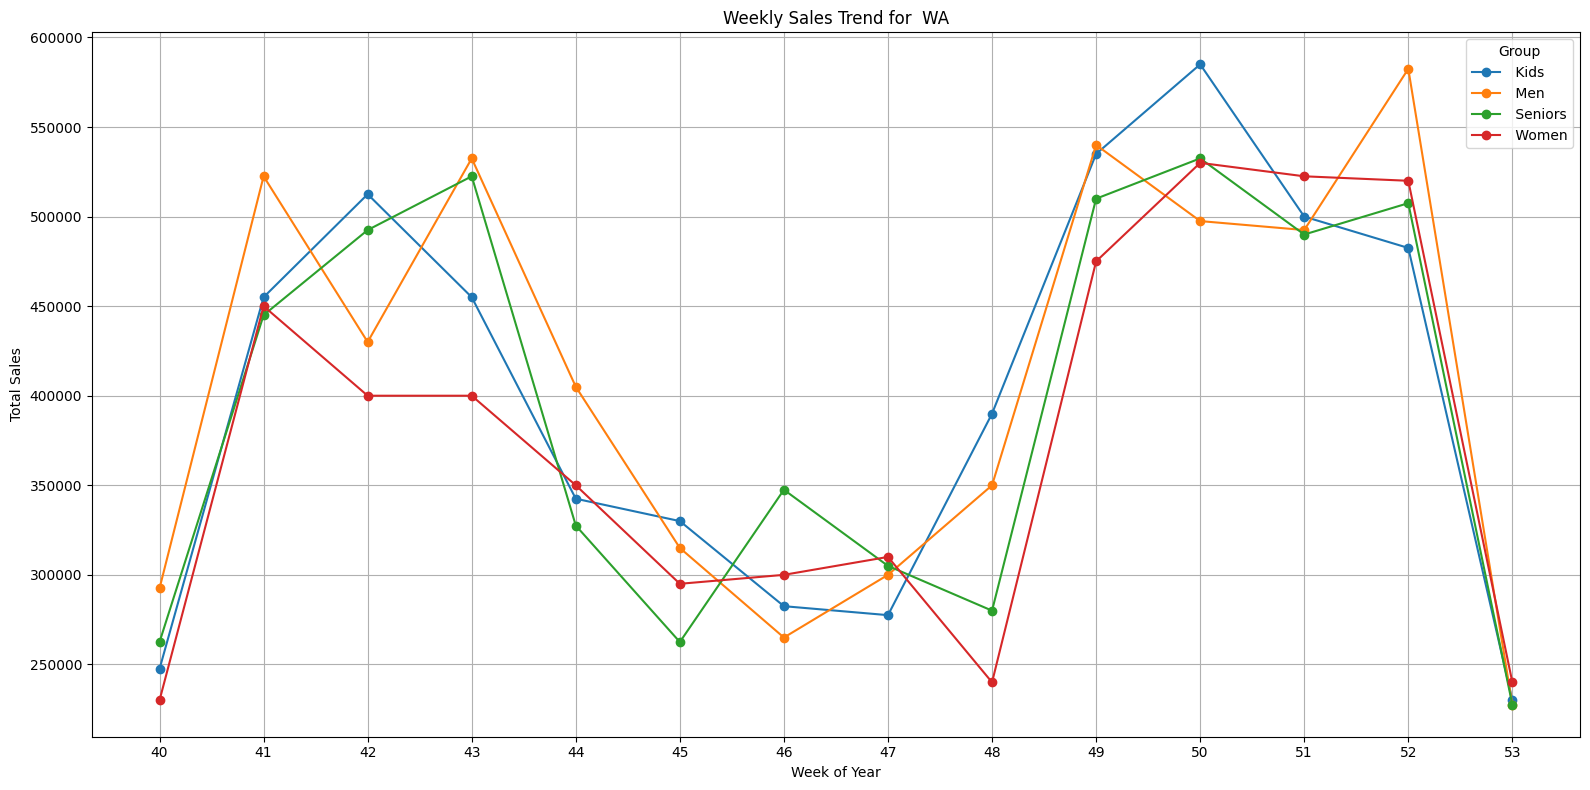

In [37]:
# Group by State, Group, and Week of Year to get weekly sales
state_group_weekly_sales = fourth_quarter_df.groupby(
    ['State', 'Group', fourth_quarter_df['Date'].dt.isocalendar().week]
)['Sales'].sum().reset_index()

# Rename the week column for clarity
state_group_weekly_sales = state_group_weekly_sales.rename(columns={'week': 'Week'})

# Get unique states and groups for plotting
states = state_group_weekly_sales['State'].unique()
groups = state_group_weekly_sales['Group'].unique()

# Create a faceted line plot to show weekly sales trends
for state in states:
    plt.figure(figsize=(16, 8))
    state_data = state_group_weekly_sales[state_group_weekly_sales['State'] == state]
    for group in groups:
        group_data = state_data[state_data['Group'] == group]
        plt.plot(group_data['Week'], group_data['Sales'], marker='o', linestyle='-', label=group)

    plt.xlabel('Week of Year')
    plt.ylabel('Total Sales')
    plt.title(f'Weekly Sales Trend for {state}')
    plt.legend(title='Group')
    plt.grid(True)
    plt.xticks(sorted(state_group_weekly_sales['Week'].unique()))
    plt.tight_layout()
    plt.show()

#### __Monthly Sales__

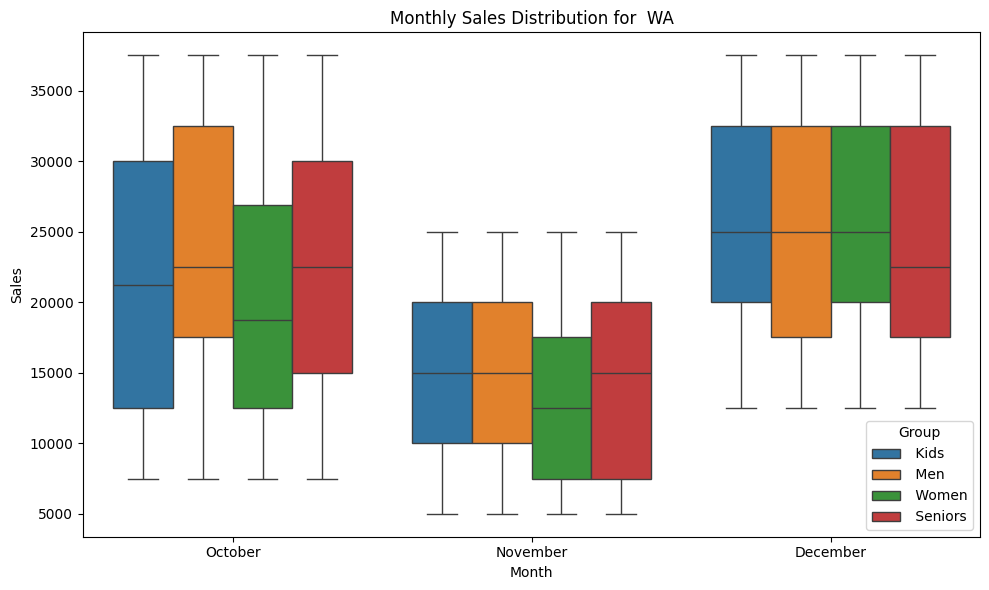

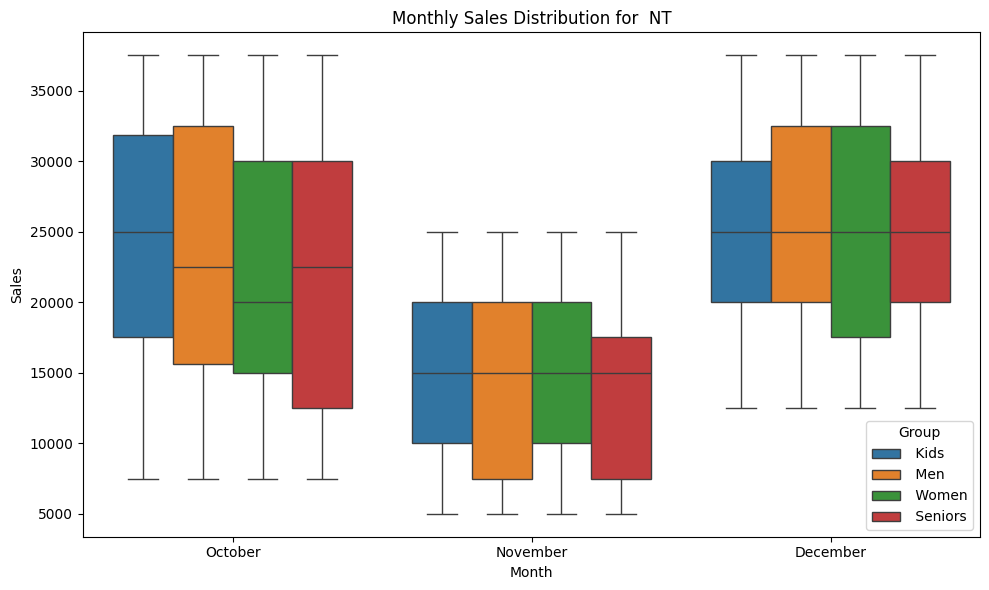

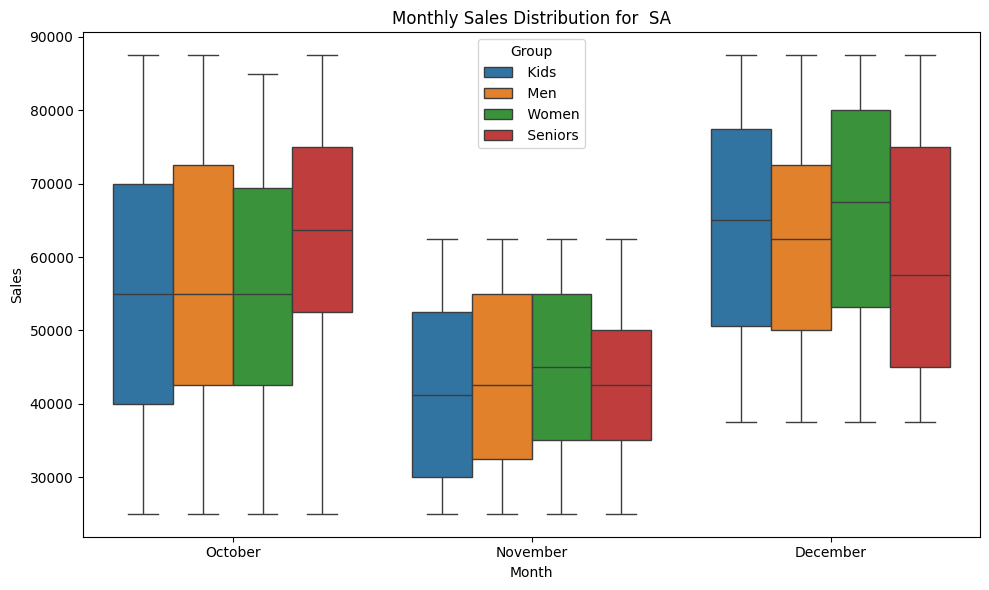

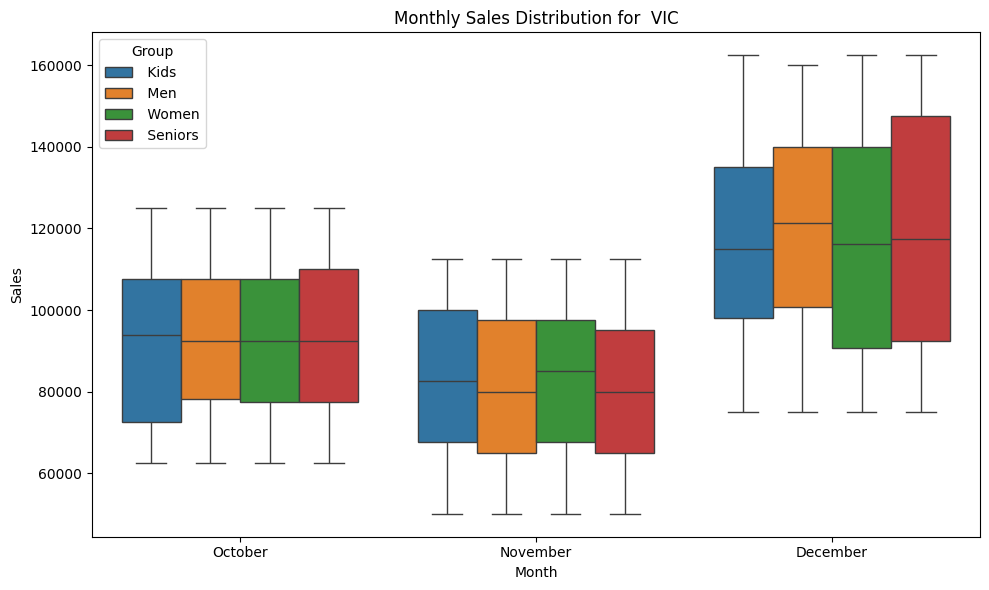

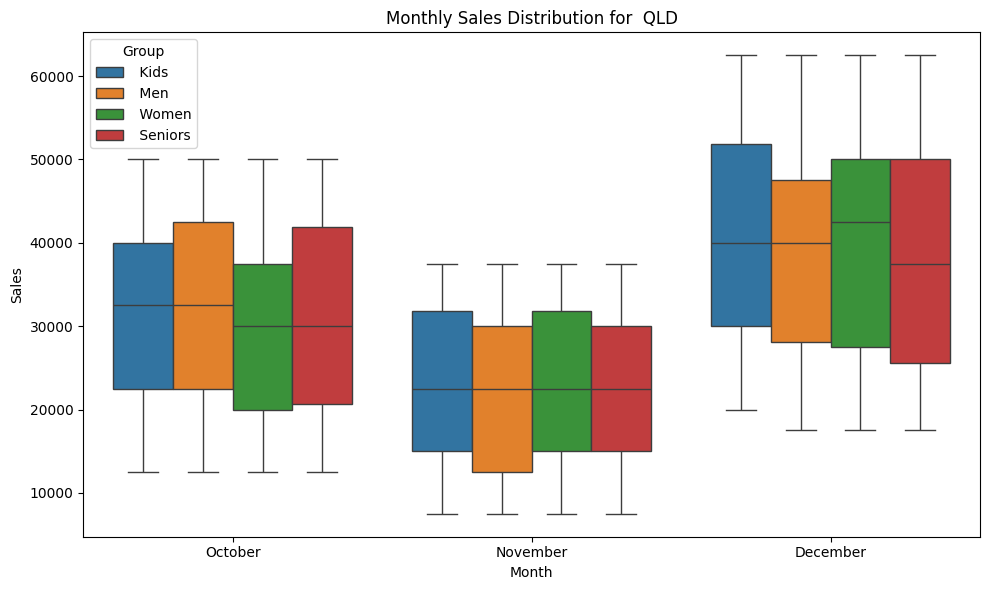

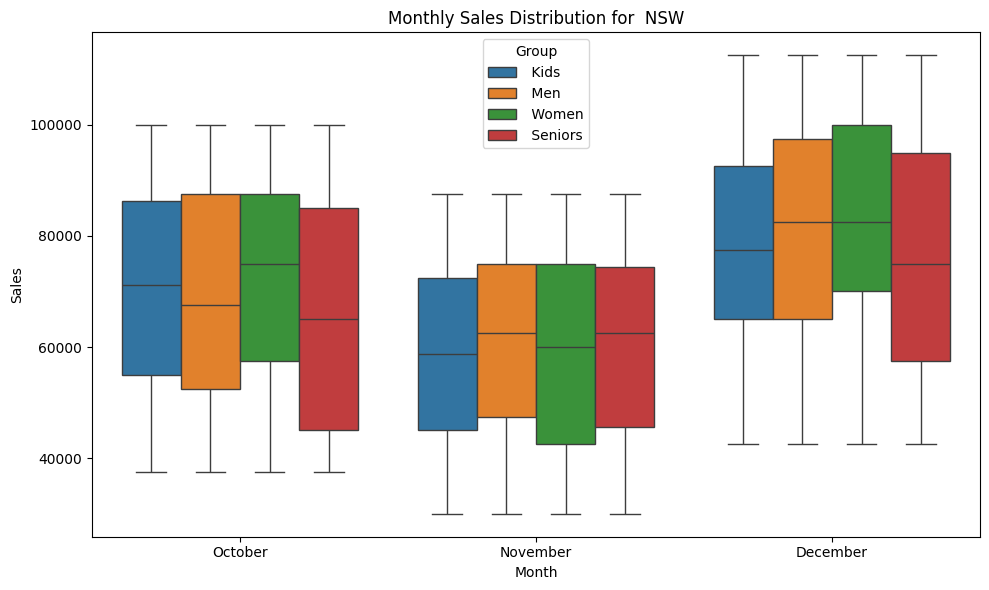

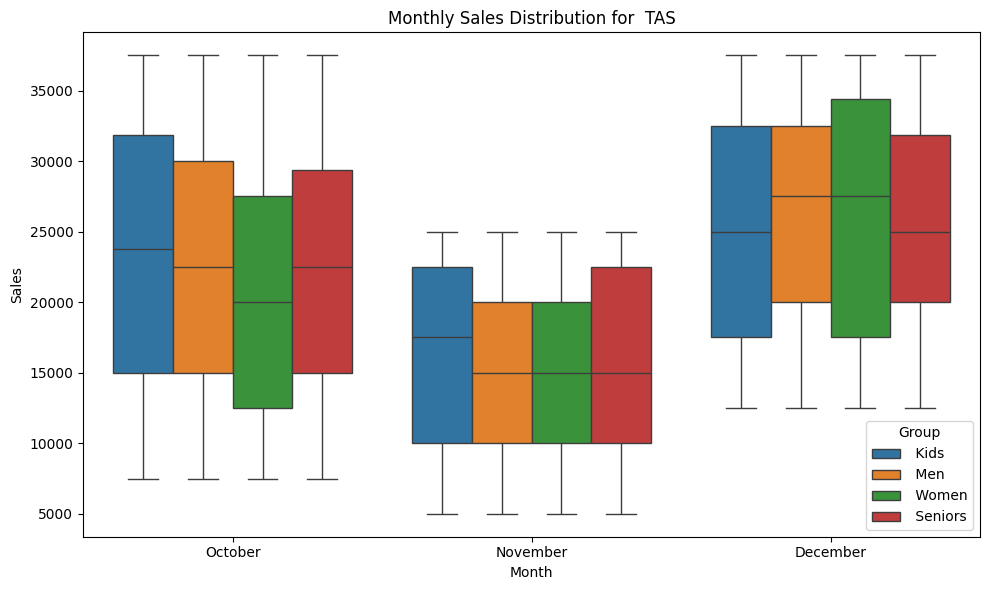

In [38]:
# Create box plots for monthly sales analysis
states = fourth_quarter_df['State'].unique()
fourth_quarter_df['Month'] = fourth_quarter_df['Date'].dt.strftime('%B')

for state in states:
    plt.figure(figsize=(10, 6))
    state_data = fourth_quarter_df[fourth_quarter_df['State'] == state]
    sns.boxplot(x='Month', y='Sales', hue='Group', data=state_data,
                order=['October', 'November', 'December'])  # Ensure correct month order
    plt.title(f'Monthly Sales Distribution for {state}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()

#### __Quarterly Sales__

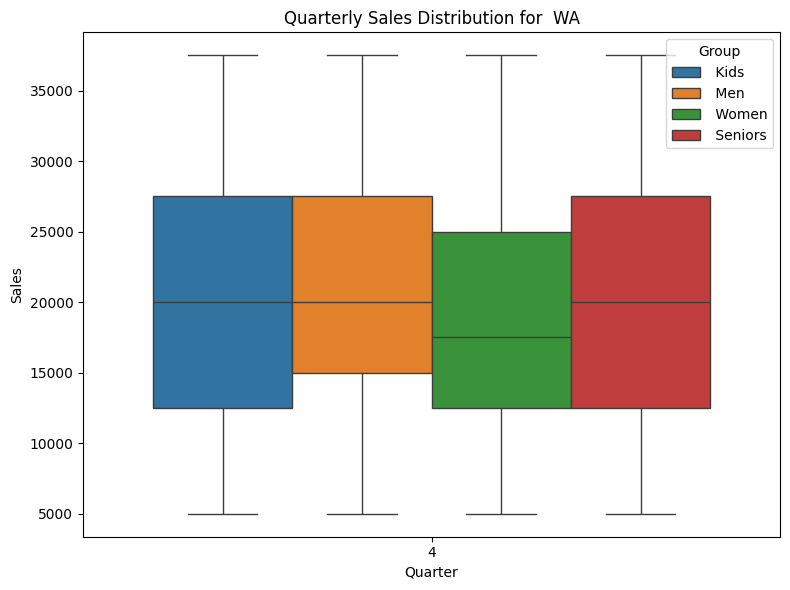

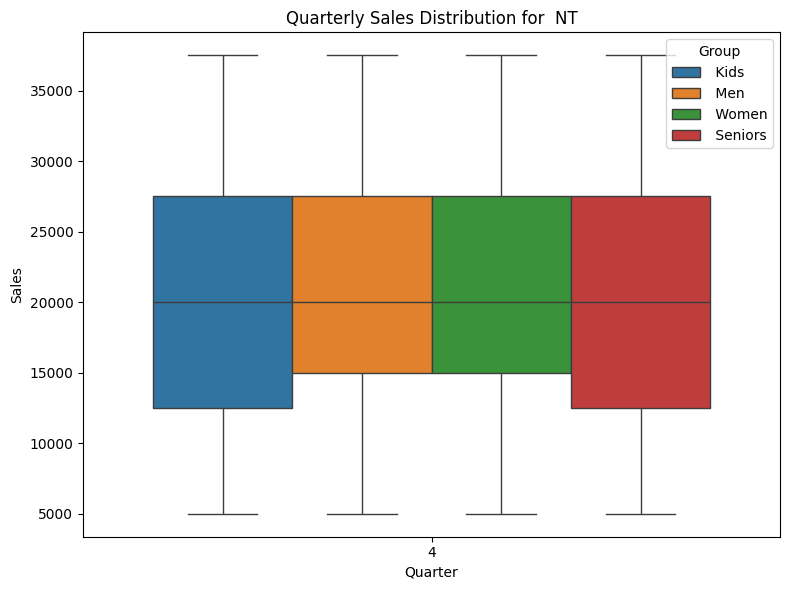

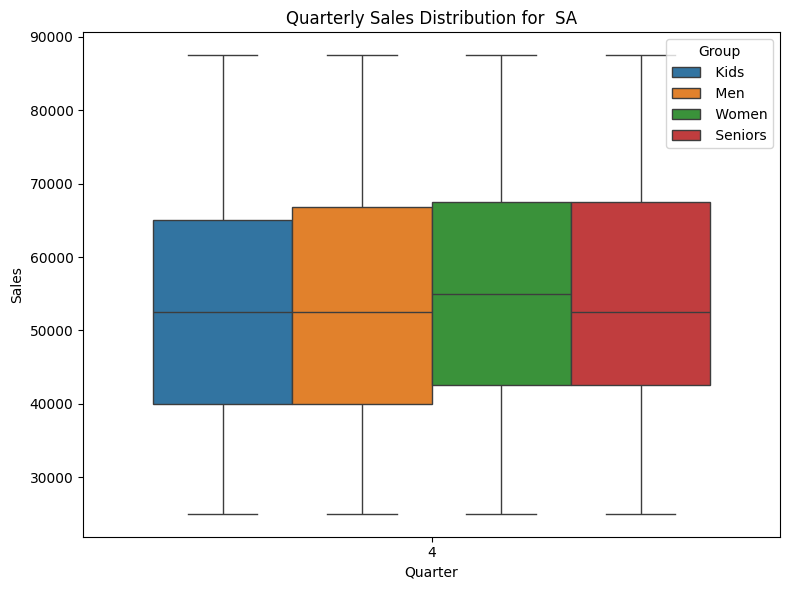

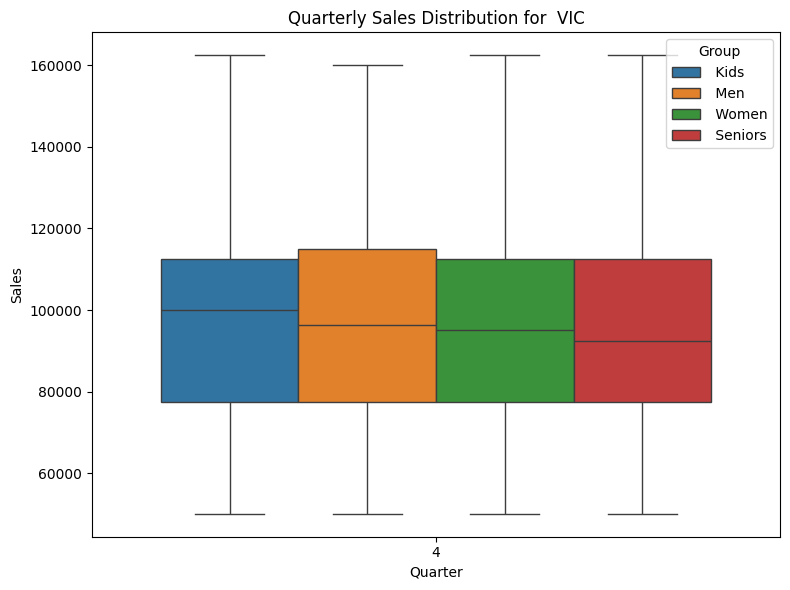

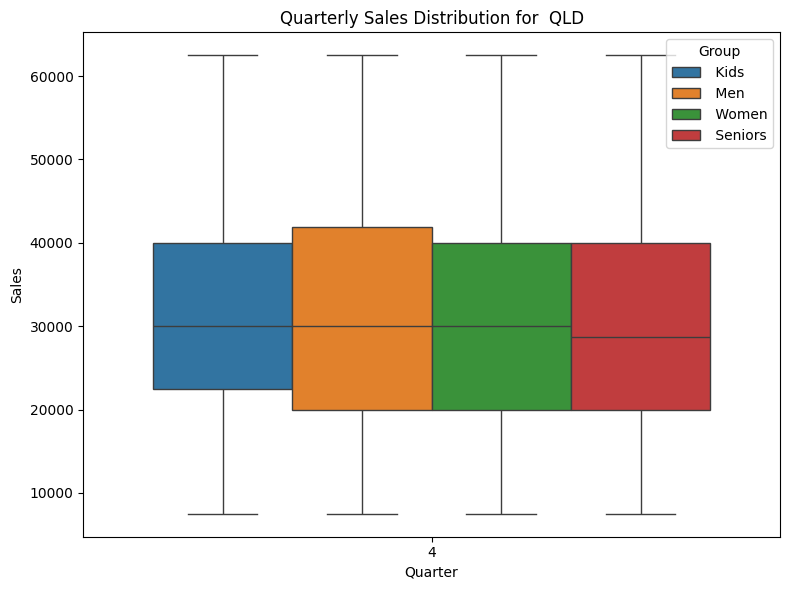

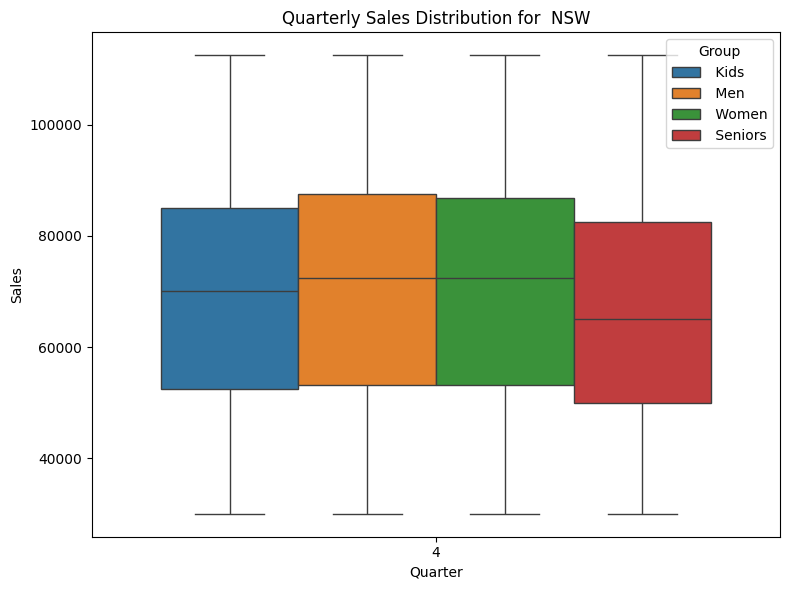

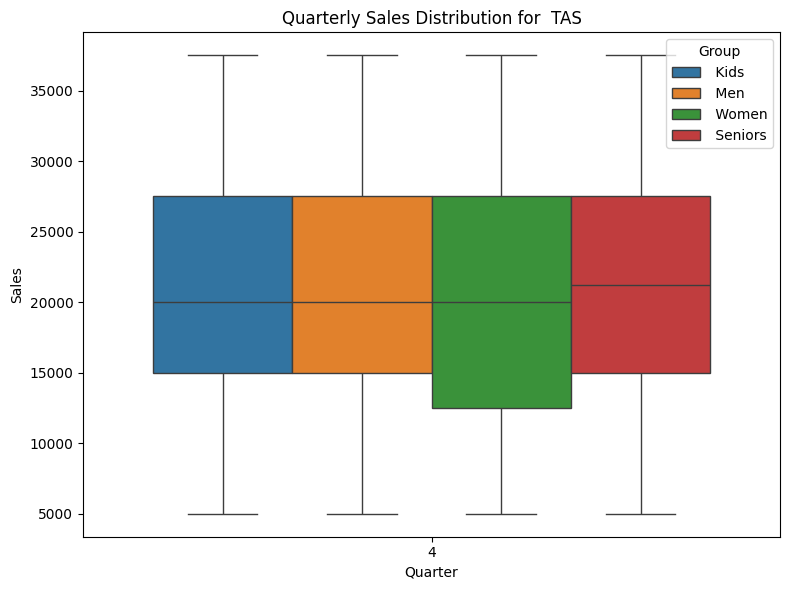

In [39]:
# Add a 'Quarter' column to the DataFrame
fourth_quarter_df['Quarter'] = fourth_quarter_df['Date'].dt.quarter.astype(str) # changed this line

# Create box plots for quarterly sales analysis
states = fourth_quarter_df['State'].unique()

for state in states:
    plt.figure(figsize=(8, 6))
    state_data = fourth_quarter_df[fourth_quarter_df['State'] == state]
    sns.boxplot(x='Quarter', y='Sales', hue='Group', data=state_data)
    plt.title(f'Quarterly Sales Distribution for {state}')
    plt.xlabel('Quarter')
    plt.ylabel('Sales')
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()

### __Group-wise Sales Across States__

In [44]:
# Group the data by Group and State and calculate the sum of Sales
group_state_sales = fourth_quarter_df.groupby(['Group', 'State'])['Sales'].sum().reset_index()

# Display the first 5 rows
print(group_state_sales.head())

   Group State       Sales
0   Kids   NSW  18587500.0
1   Kids    NT   5700000.0
2   Kids   QLD   8510000.0
3   Kids    SA  14515000.0
4   Kids   TAS   5775000.0


In [45]:
# Print the column names and their data types
print(group_state_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   28 non-null     object 
 1   State   28 non-null     object 
 2   Sales   28 non-null     float32
dtypes: float32(1), object(2)
memory usage: 692.0+ bytes
None


#### __Daily Sales__

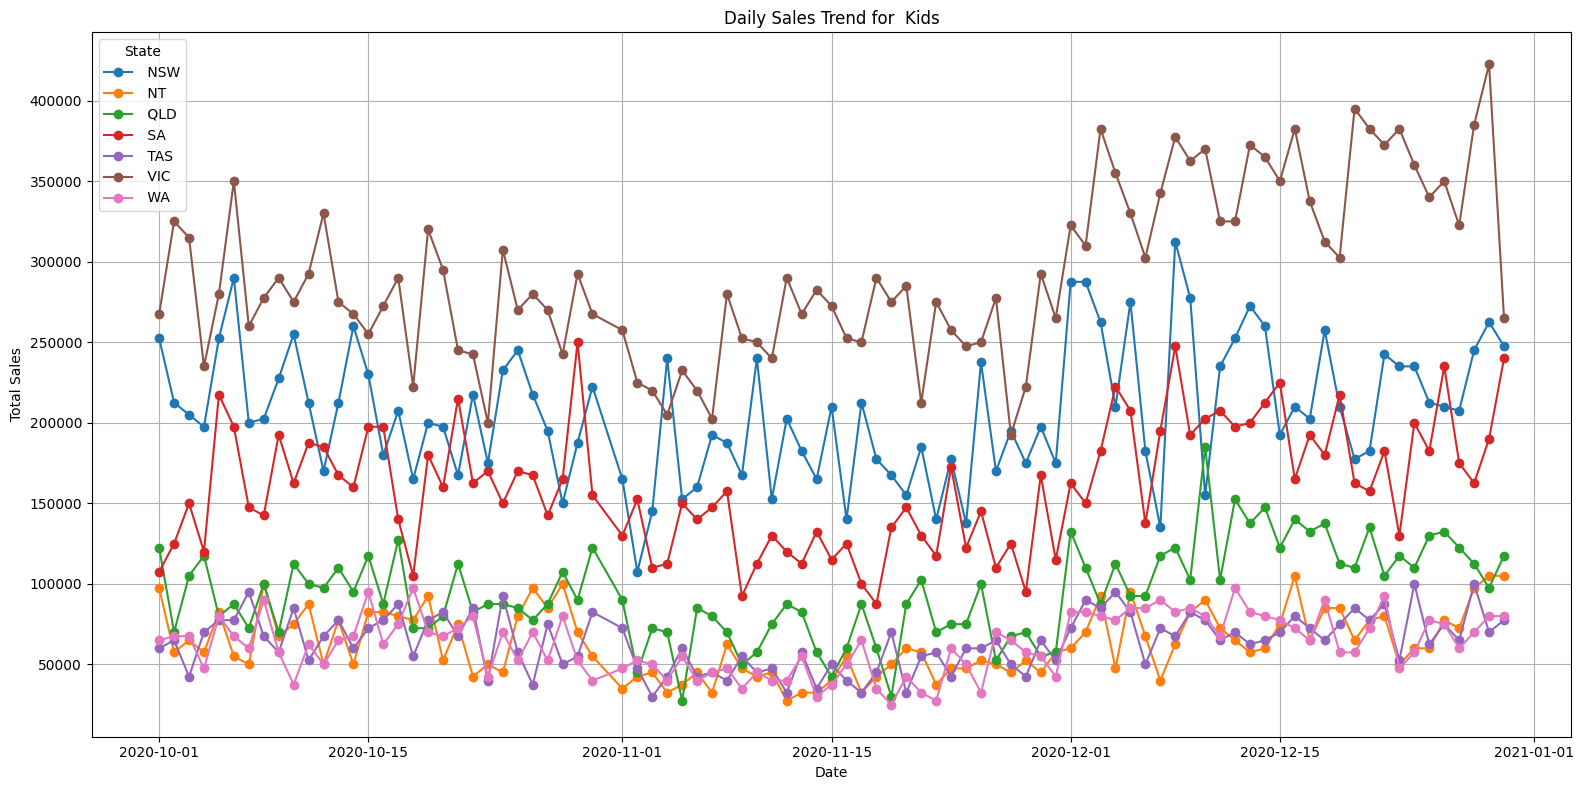

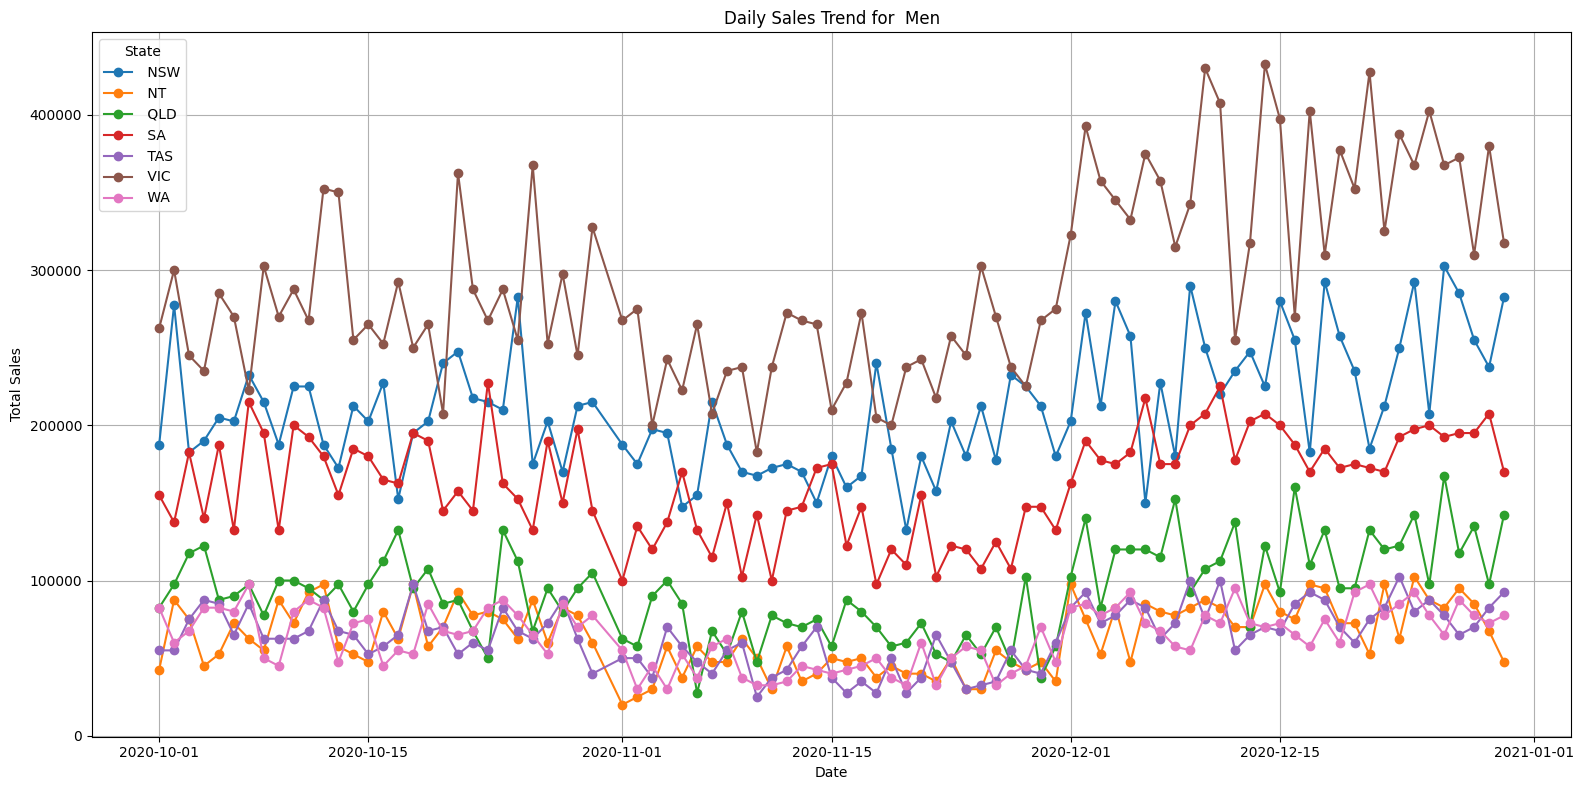

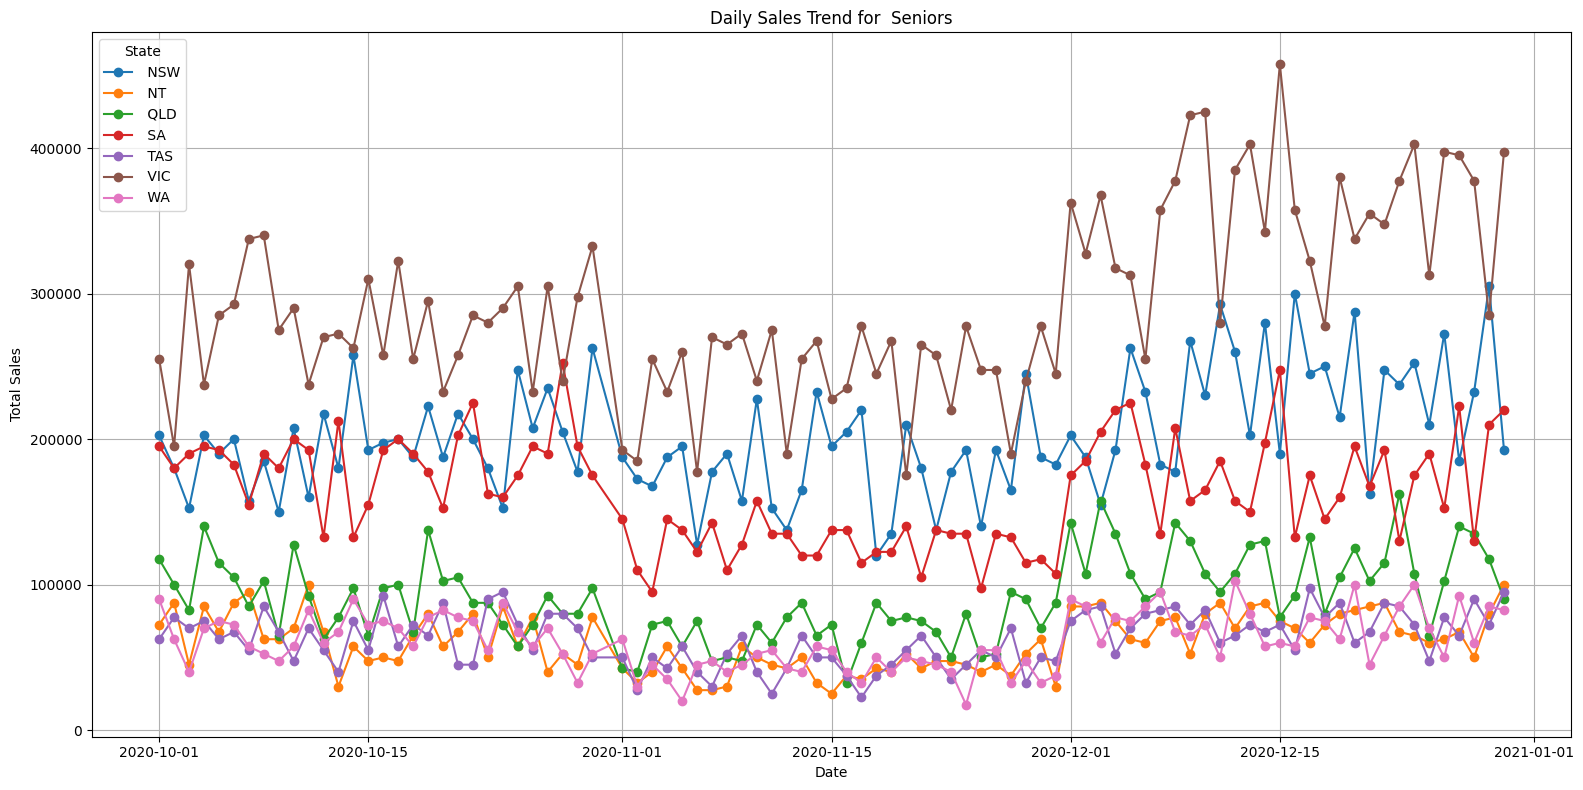

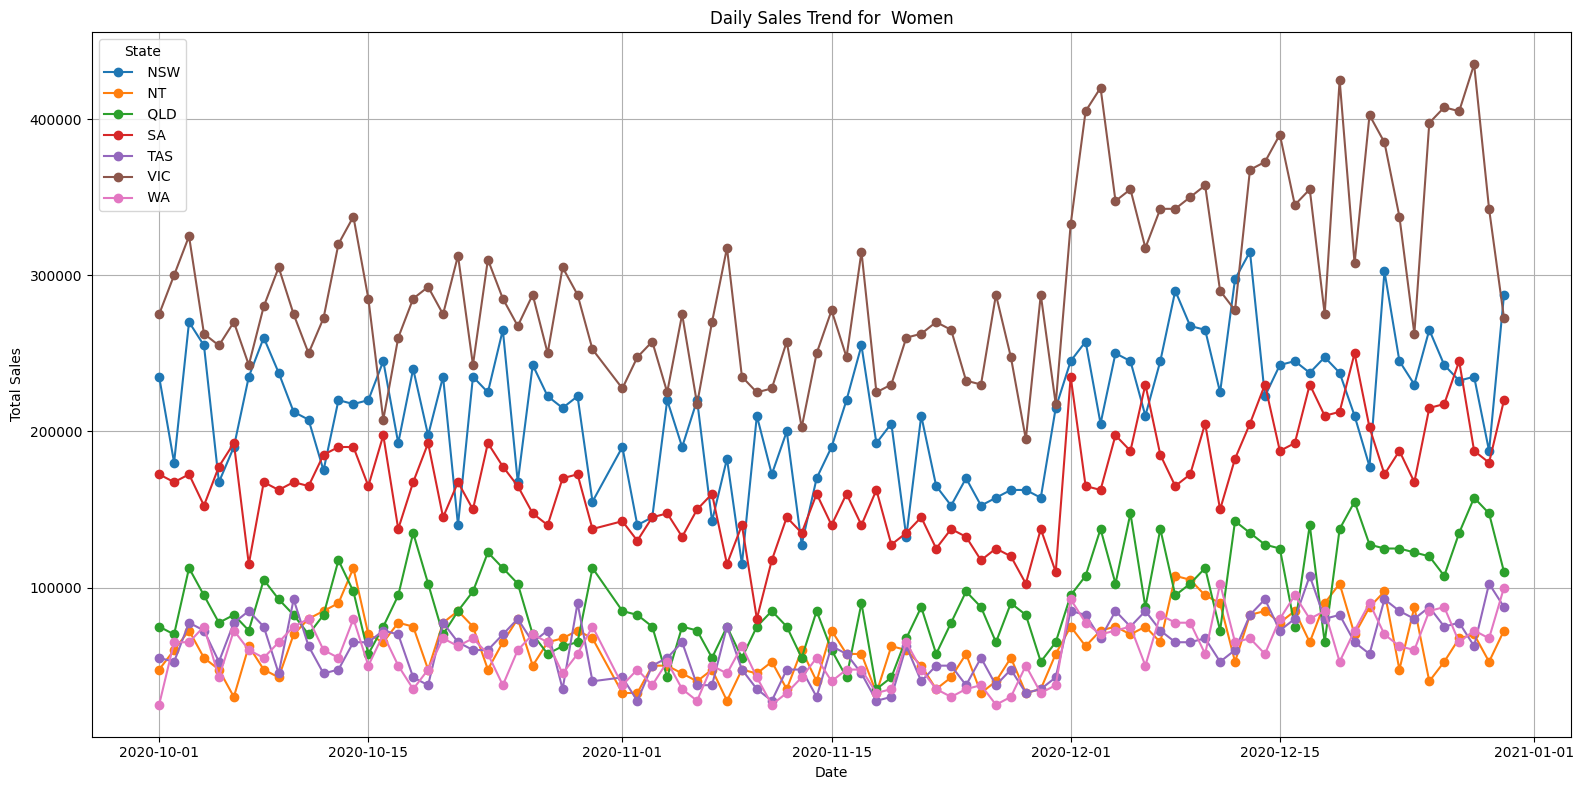

In [46]:
# Group by Group, State, and Date to get daily sales
group_state_daily_sales = fourth_quarter_df.groupby(['Group', 'State', 'Date'])['Sales'].sum().reset_index()

# Get unique groups and states for plotting
groups = group_state_daily_sales['Group'].unique()
states = group_state_daily_sales['State'].unique()

# Create a faceted line plot to show daily sales trends
for group in groups:
    plt.figure(figsize=(16, 8))
    group_data = group_state_daily_sales[group_state_daily_sales['Group'] == group]
    for state in states:
        state_data = group_data[group_data['State'] == state]
        plt.plot(state_data['Date'], state_data['Sales'], marker='o', linestyle='-', label=state)

    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.title(f'Daily Sales Trend for {group}')
    plt.legend(title='State')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### __Weekly Sales__

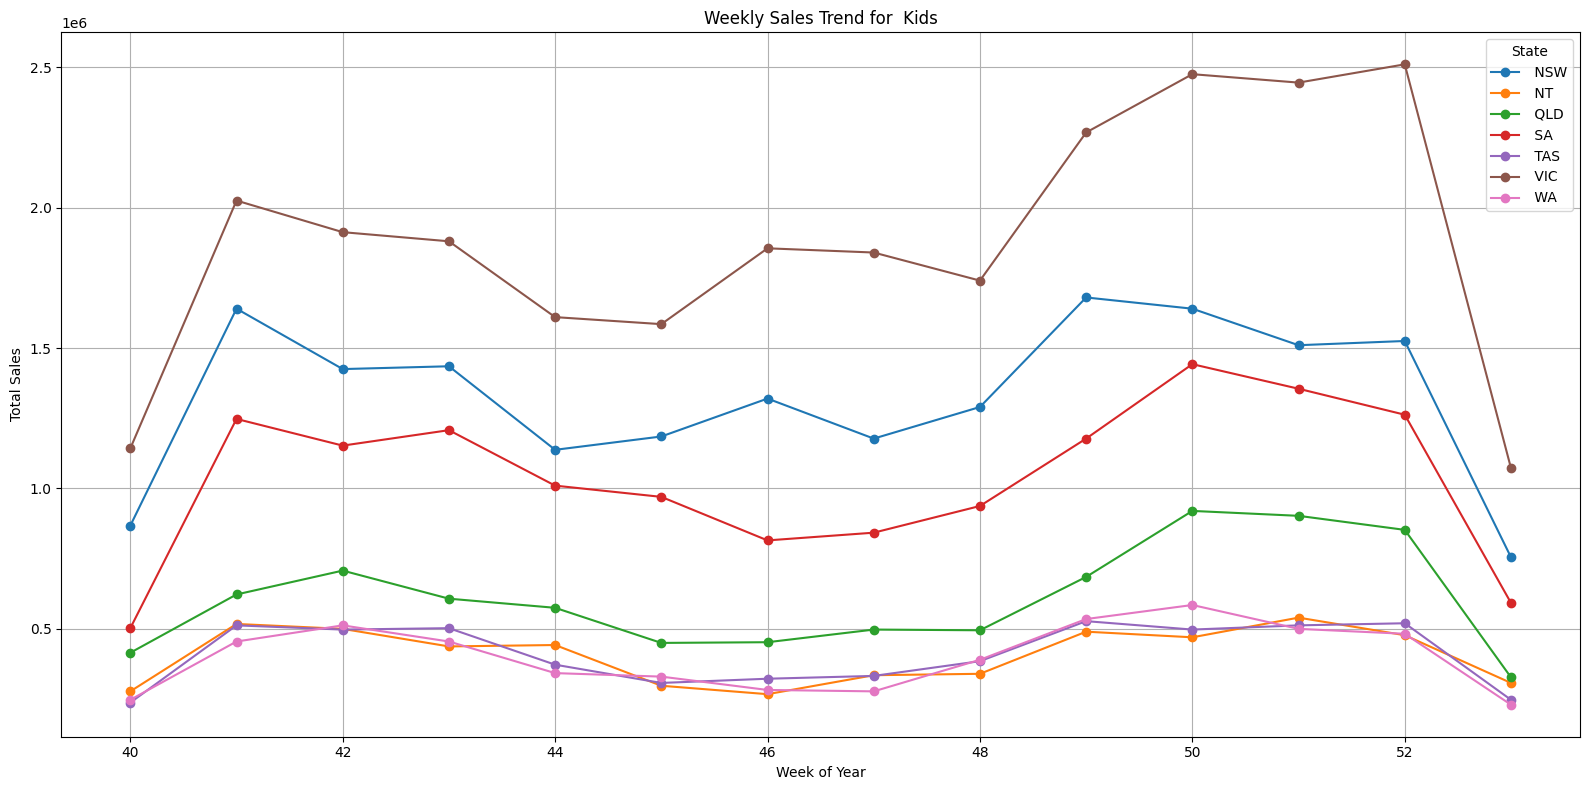

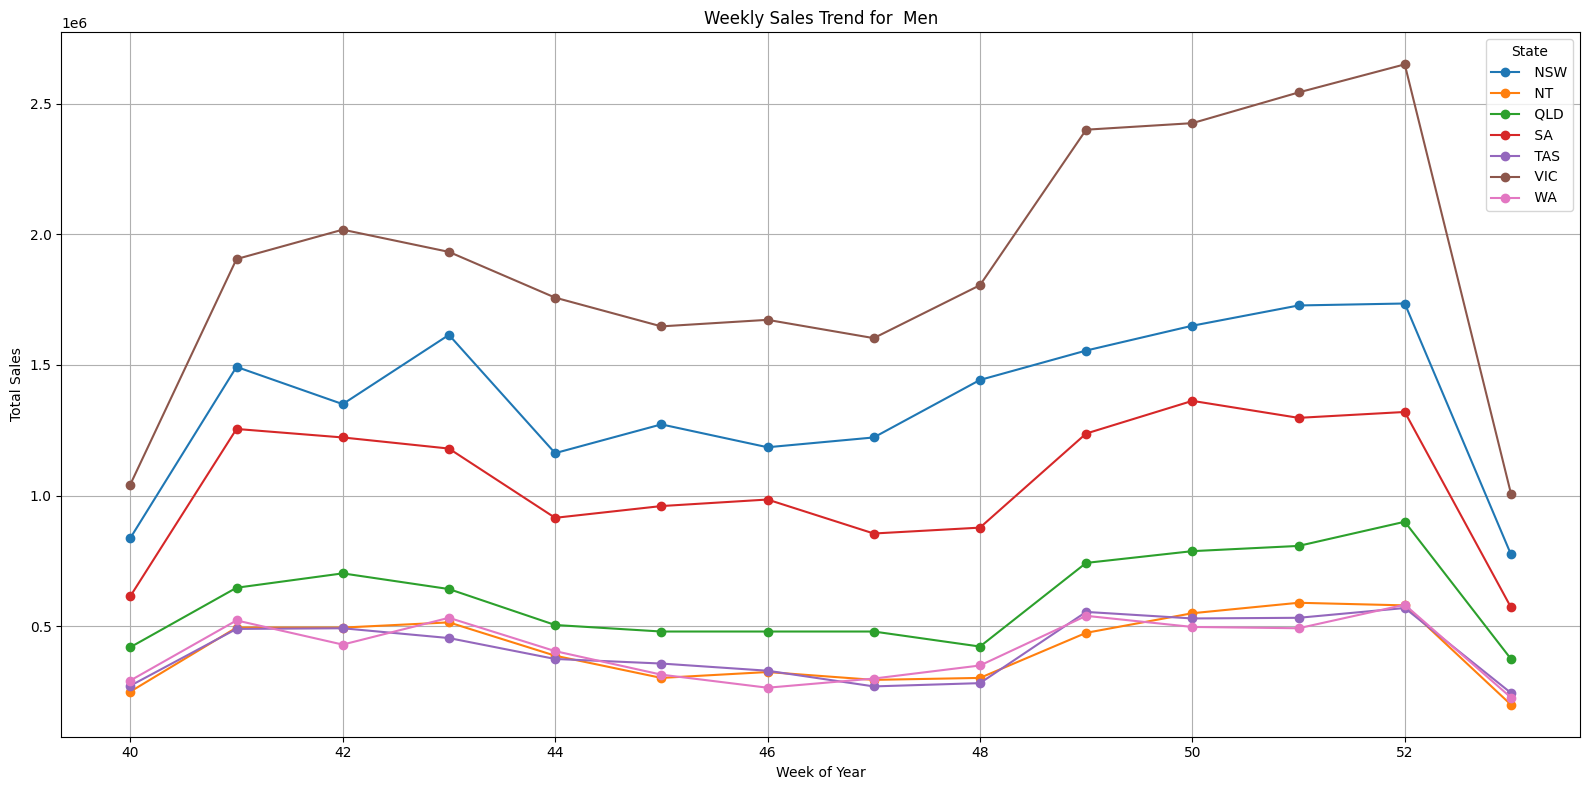

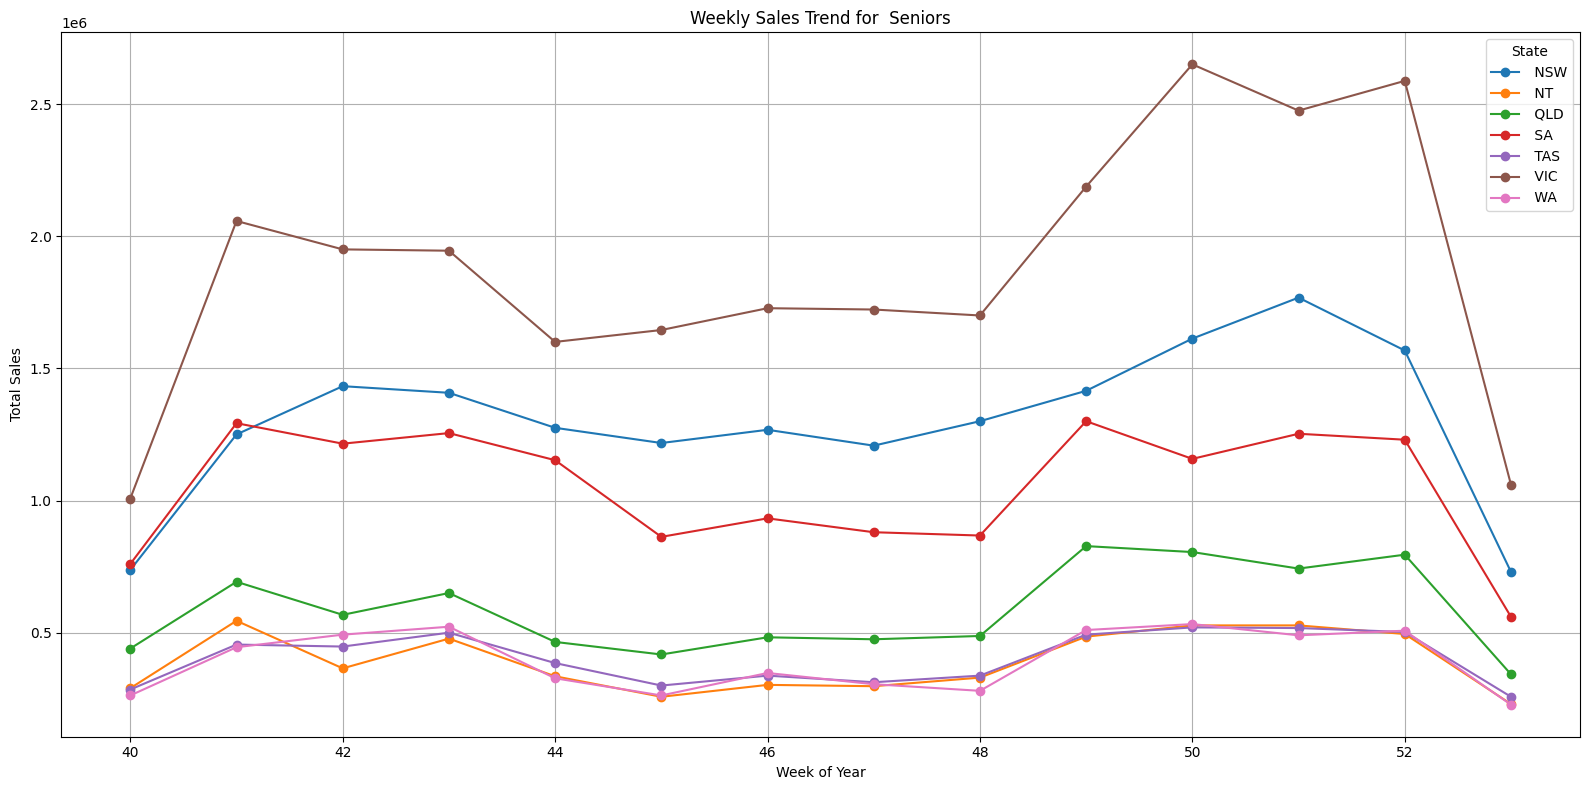

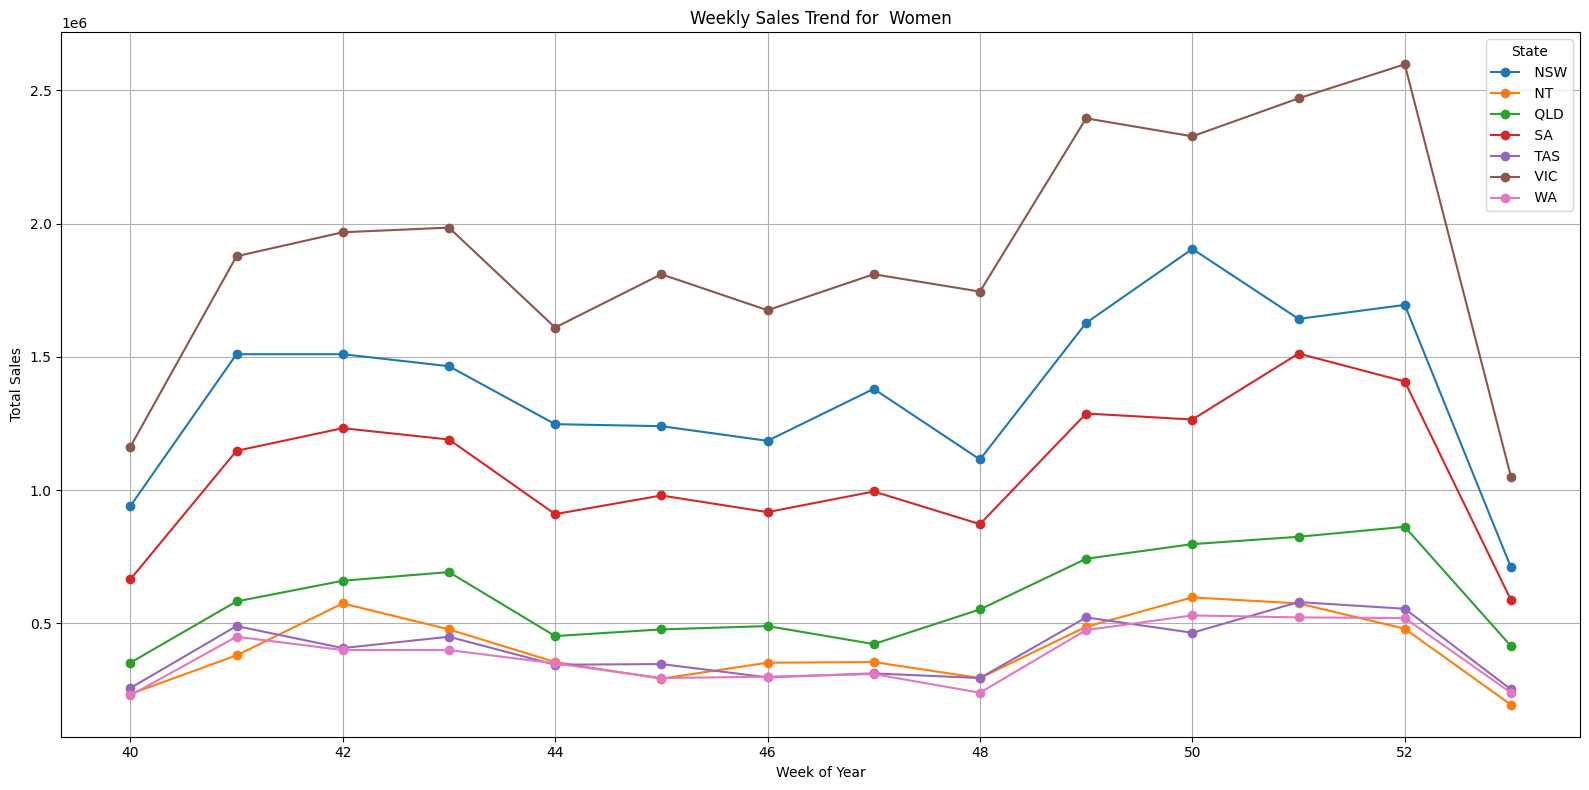

In [47]:
# Group by Group, State, and Week to get weekly sales
group_state_weekly_sales = fourth_quarter_df.groupby(['Group', 'State', fourth_quarter_df['Date'].dt.isocalendar().week])['Sales'].sum().reset_index()

# Get unique groups and states for plotting
groups = group_state_weekly_sales['Group'].unique()
states = group_state_weekly_sales['State'].unique()

# Create a faceted line plot to show weekly sales trends
for group in groups:
    plt.figure(figsize=(16, 8))
    group_data = group_state_weekly_sales[group_state_weekly_sales['Group'] == group]
    for state in states:
        state_data = group_data[group_data['State'] == state]
        plt.plot(state_data[state_data.columns[-2]], state_data['Sales'], marker='o', linestyle='-', label=state) # changed this line

    plt.xlabel('Week of Year')
    plt.ylabel('Total Sales')
    plt.title(f'Weekly Sales Trend for {group}')
    plt.legend(title='State')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### __Monthly Sales__

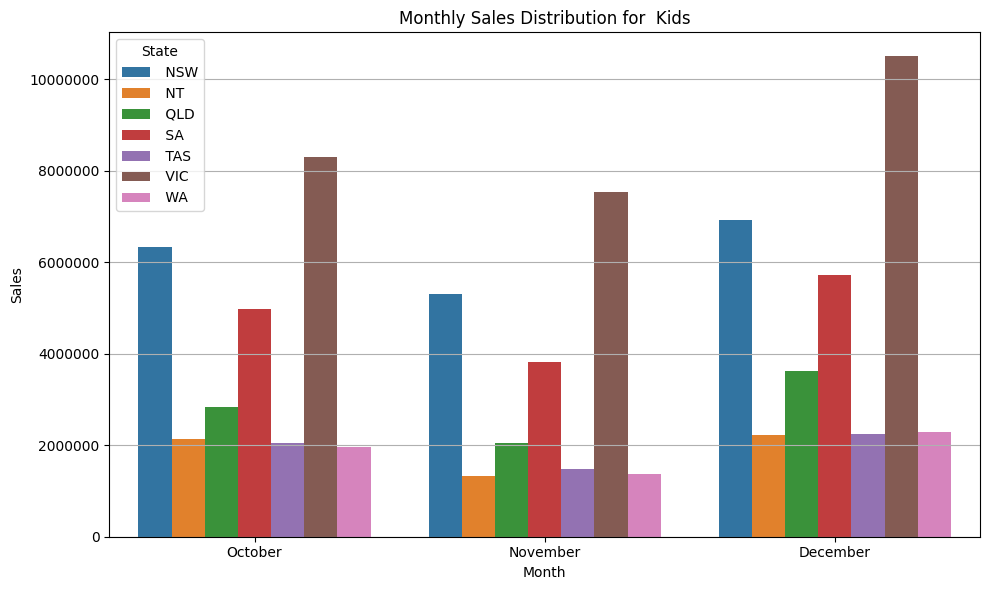

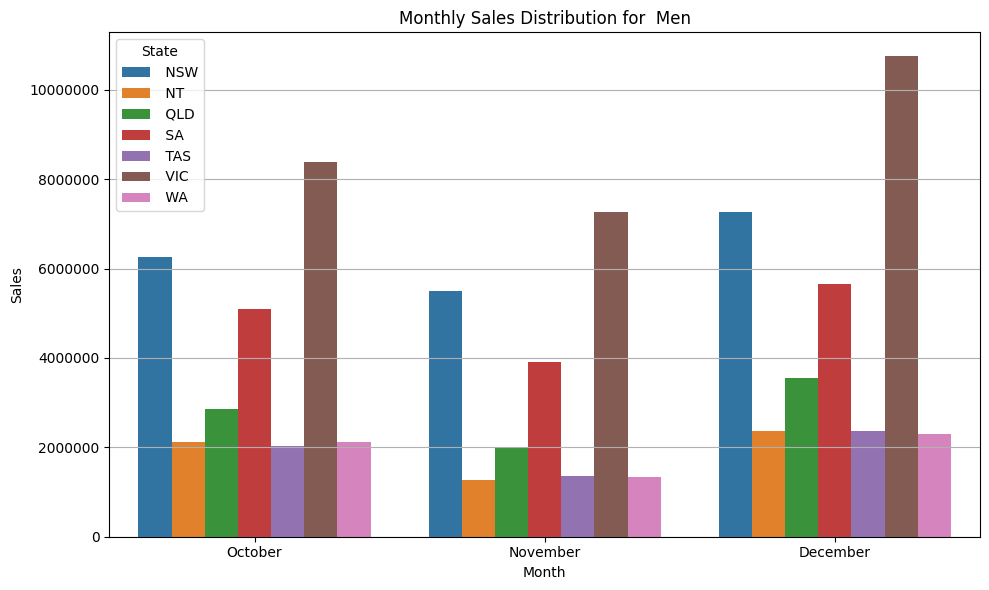

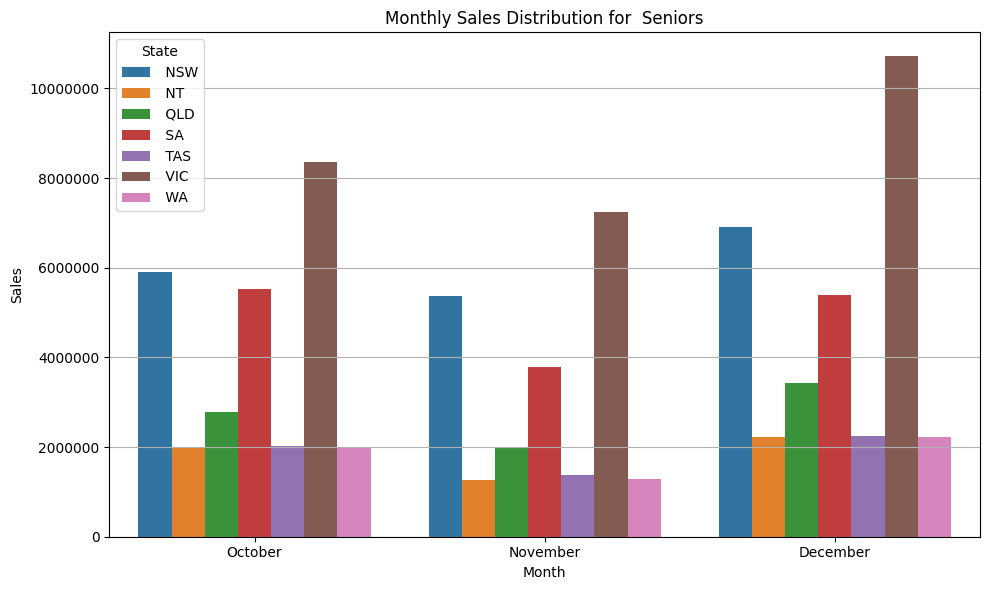

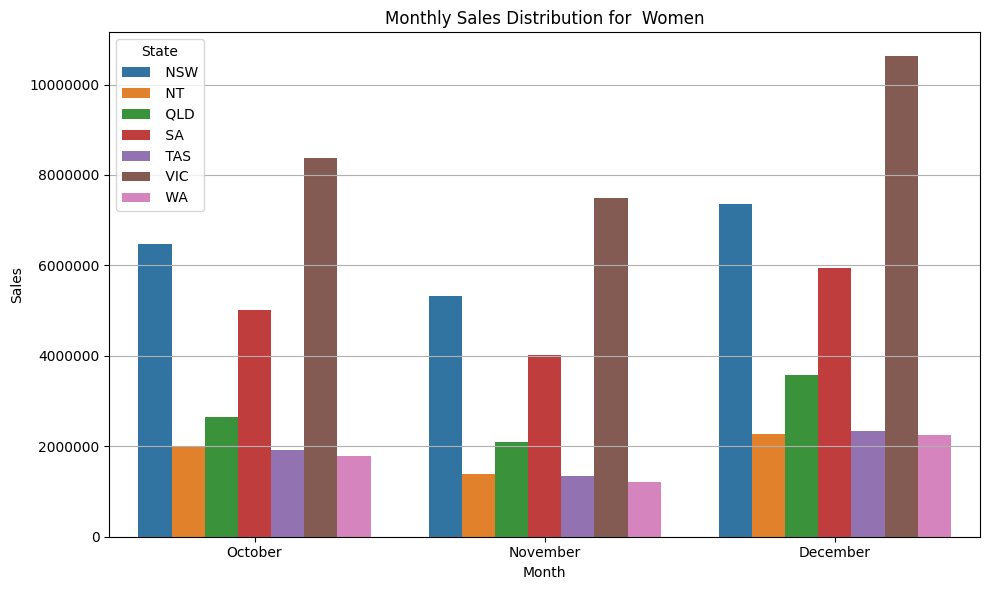

In [48]:
# Add a 'Month' column to the DataFrame
fourth_quarter_df['Month'] = fourth_quarter_df['Date'].dt.strftime('%B')

# Group by Group, State, and Month to get monthly sales
group_state_monthly_sales = fourth_quarter_df.groupby(['Group', 'State', 'Month'])['Sales'].sum().reset_index()

# Define the order of the months
month_order = ['October', 'November', 'December']

# Create bar charts for monthly sales analysis
groups = group_state_monthly_sales['Group'].unique()
for group in groups:
    plt.figure(figsize=(10, 6))
    group_data = group_state_monthly_sales[group_state_monthly_sales['Group'] == group]
    sns.barplot(x='Month', y='Sales', hue='State', data=group_data, order=month_order)
    plt.title(f'Monthly Sales Distribution for {group}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.legend(title='State')
    plt.grid(axis='y') # Add grid lines to the y-axis
    plt.ticklabel_format(style='plain', axis='y') # Ensure full numbers are displayed
    plt.tight_layout()
    plt.show()

#### __Quarterly Sales__

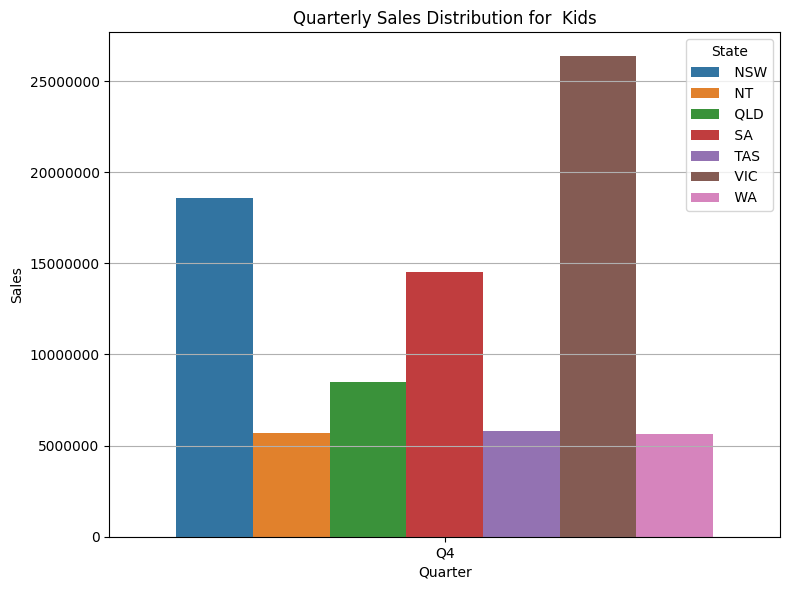

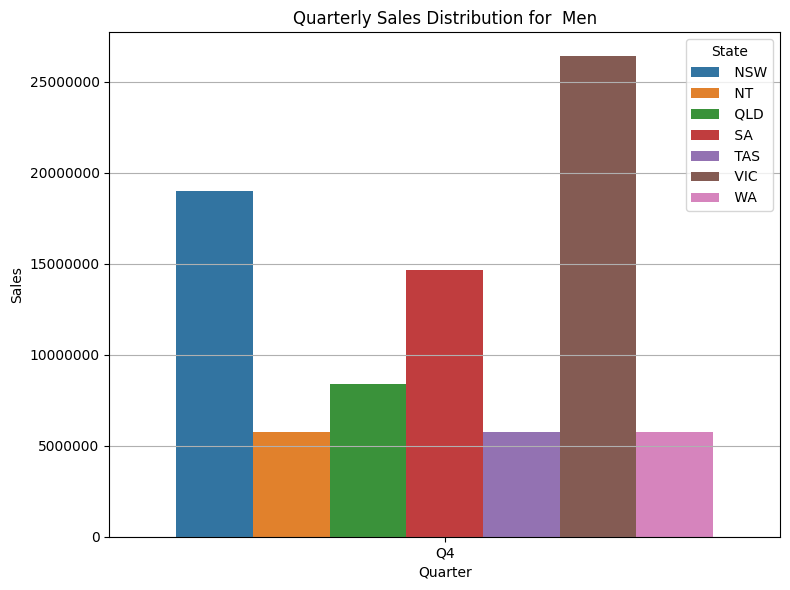

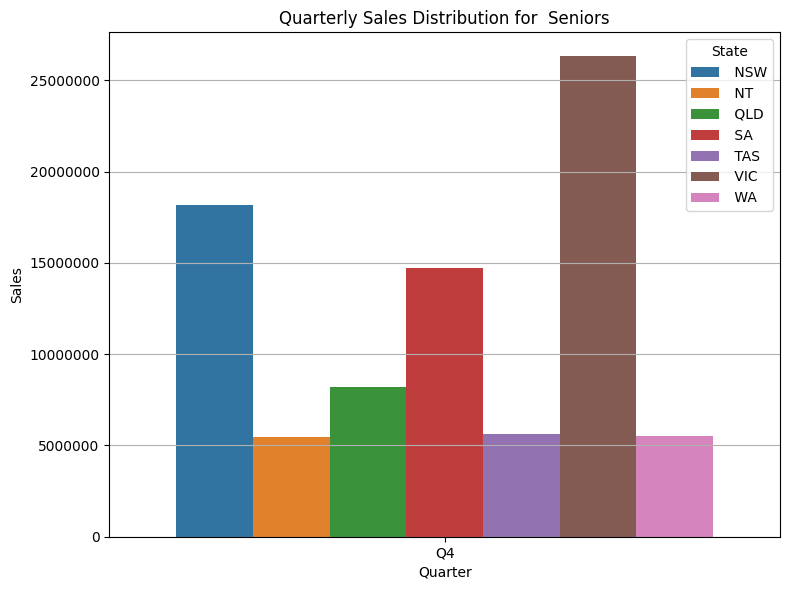

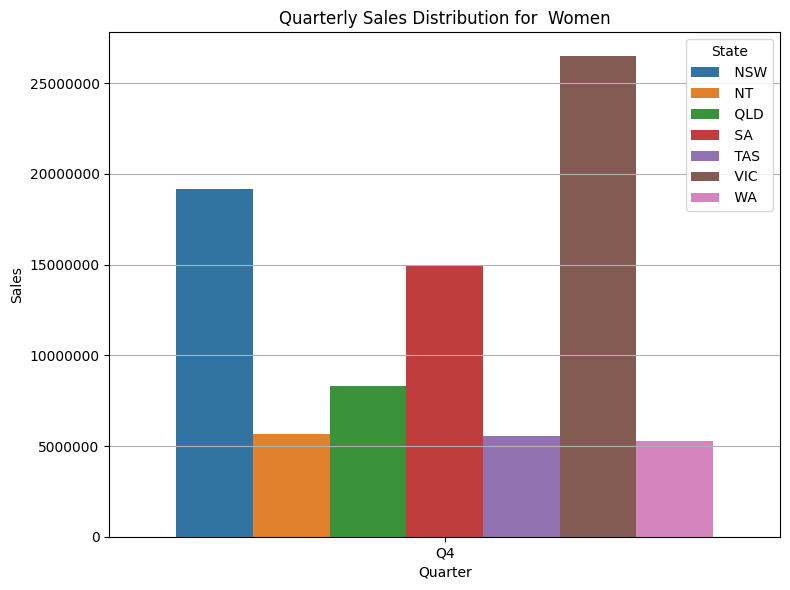

In [50]:
# Add a 'Quarter' column to the DataFrame
fourth_quarter_df['Quarter'] = 'Q' + fourth_quarter_df['Date'].dt.quarter.astype(str)

# Group by Group, State, and Quarter to get quarterly sales
group_state_quarterly_sales = fourth_quarter_df.groupby(['Group', 'State', 'Quarter'])['Sales'].sum().reset_index()

# Add a 'Quarter' column to the DataFrame
fourth_quarter_df['Quarter'] = 'Q' + fourth_quarter_df['Date'].dt.quarter.astype(str)

# Group by Group, State, and Quarter to get quarterly sales
group_state_quarterly_sales = fourth_quarter_df.groupby(['Group', 'State', 'Quarter'])['Sales'].sum().reset_index()

# Define the order of the quarters (not strictly necessary here, but good practice)
quarter_order = ['Q4']  # Since we are only looking at the 4th quarter

# Create bar charts for quarterly sales analysis
groups = group_state_quarterly_sales['Group'].unique()
for group in groups:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    group_data = group_state_quarterly_sales[group_state_quarterly_sales['Group'] == group]
    sns.barplot(x='Quarter', y='Sales', hue='State', data=group_data, order=quarter_order)
    plt.title(f'Quarterly Sales Distribution for {group}')
    plt.xlabel('Quarter')
    plt.ylabel('Sales')
    plt.legend(title='State')
    plt.grid(axis='y')  # Add grid lines to the y-axis
    plt.ticklabel_format(style='plain', axis='y')  # Ensure full numbers are displayed
    plt.tight_layout()
    plt.show()

### __Time of Day Analysis__

In [51]:
 # Group the data by Time and calculate the sum of Sales
time_of_day_sales = fourth_quarter_df.groupby('Time')['Sales'].sum().reset_index()

# Display the aggregated dataframe
print(time_of_day_sales)

         Time        Sales
0   Afternoon  114007504.0
1     Evening  112087504.0
2     Morning  114207504.0


In [52]:
# Print the column names and their data types
print(time_of_day_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3 non-null      object 
 1   Sales   3 non-null      float32
dtypes: float32(1), object(1)
memory usage: 168.0+ bytes
None


#### __Daily Sales__

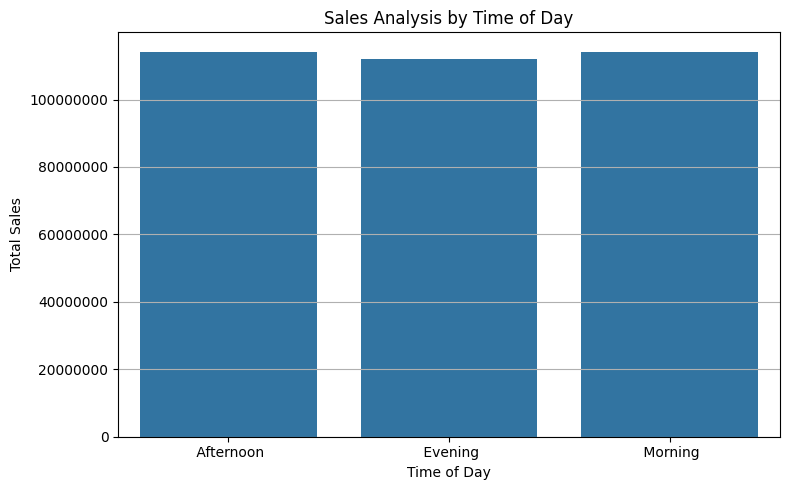

In [64]:
# Group the data by Time and calculate the sum of Sales
time_of_day_sales = fourth_quarter_df.groupby('Time')['Sales'].sum().reset_index()

# Define the order of time periods for consistent plotting
time_order = ['Morning', 'Afternoon', 'Evening']

# Create a bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Time', y='Sales', data=time_of_day_sales)
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.title('Sales Analysis by Time of Day')
plt.ticklabel_format(style='plain', axis='y')  # Ensure full numbers are displayed
plt.tight_layout()
plt.grid(axis='y')  # Add grid lines to the y-axis
plt.show()

#### __Weekly Sales__

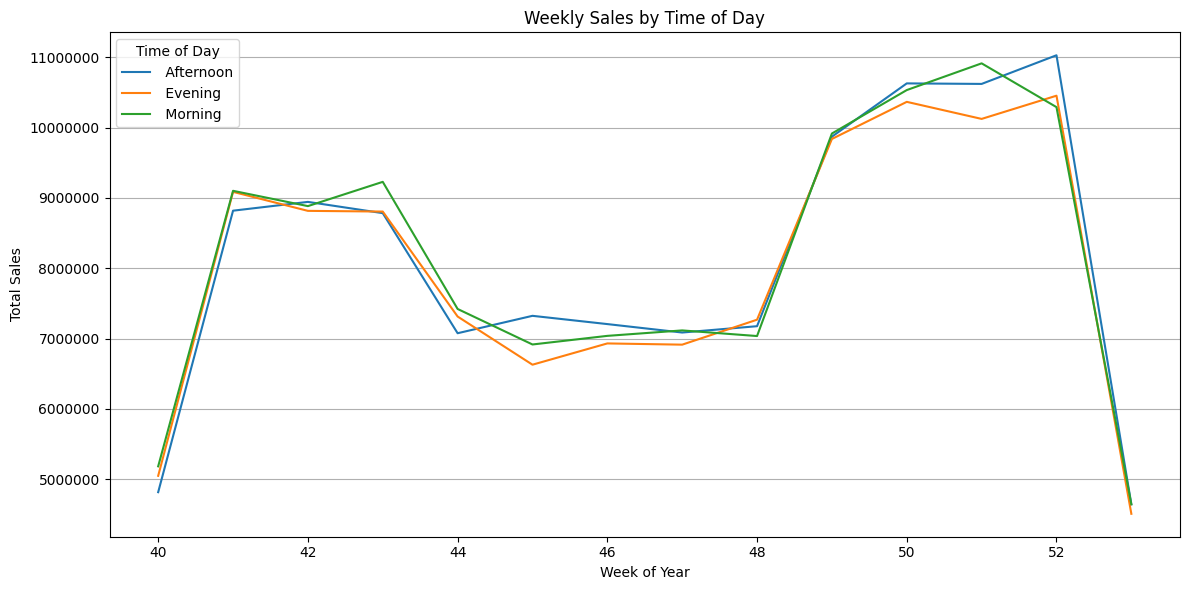

In [65]:
# Group by Time and Week to get weekly sales per time period
time_of_day_weekly_sales = fourth_quarter_df.groupby(['Time', fourth_quarter_df['Date'].dt.isocalendar().week])['Sales'].sum().reset_index()

# Rename the week column for clarity (optional but recommended)
time_of_day_weekly_sales.rename(columns={'Date': 'Week'}, inplace=True) # This line might not be needed

# Define the order of time periods for consistent plotting
time_order = ['Morning', 'Afternoon', 'Evening']

# Get unique weeks from the data for the x-axis order
# The week number is now directly in a column
week_column_name = time_of_day_weekly_sales.columns[1] # Assuming 'week' is the second column after 'Time'
week_order = sorted(time_of_day_weekly_sales[week_column_name].unique())

# Create a bar chart showing weekly sales per time of day
plt.figure(figsize=(12, 6))
sns.lineplot(x=week_column_name, y='Sales', hue='Time', data=time_of_day_weekly_sales)
plt.xlabel('Week of Year')
plt.ylabel('Total Sales')
plt.title('Weekly Sales by Time of Day')
plt.legend(title='Time of Day')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

#### __Monthly Sales__

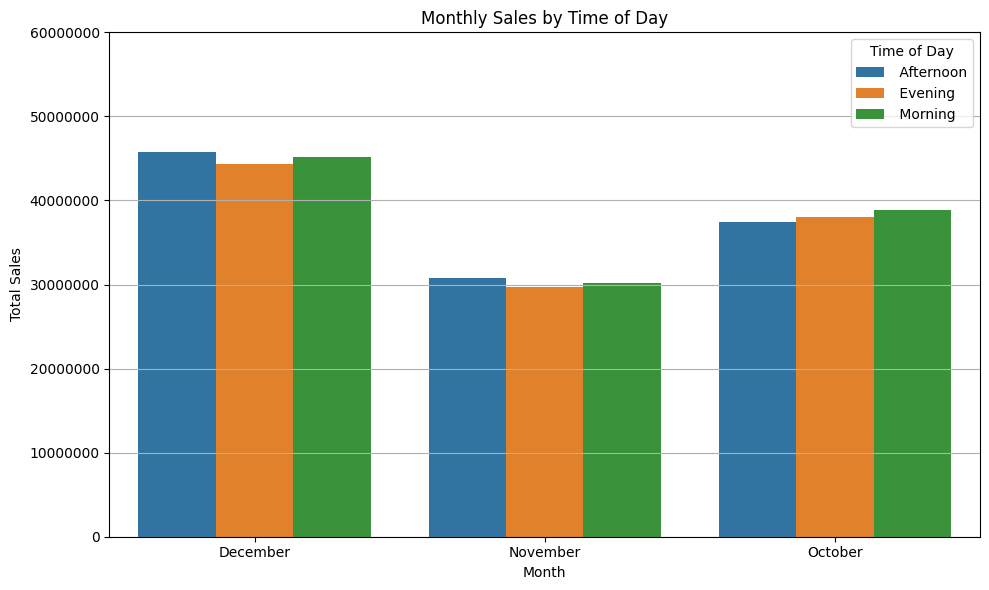

In [67]:
# Extract Month from Date
fourth_quarter_df['Month'] = fourth_quarter_df['Date'].dt.strftime('%B')

# Group by Time and Month to get monthly sales per time period
time_of_day_monthly_sales = fourth_quarter_df.groupby(['Time', 'Month'])['Sales'].sum().reset_index() # Changed grouping order slightly

# Define the order of time periods for consistent plotting
time_order = ['Morning', 'Afternoon', 'Evening']

# Define the order of months
month_order = ['October', 'November', 'December']

# Create a bar chart showing monthly sales per time of day
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', hue='Time', data=time_of_day_monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales by Time of Day')
plt.legend(title='Time of Day')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 60000000)
plt.tight_layout()
plt.show()

#### __Quarterly Sales__

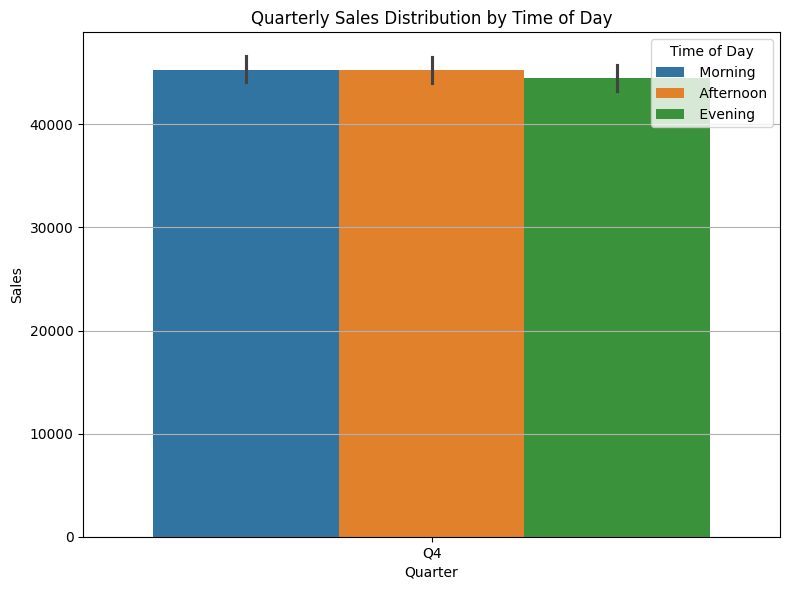

In [76]:
# Add a 'Quarter' column
fourth_quarter_df['Quarter'] = 'Q' + fourth_quarter_df['Date'].dt.quarter.astype(str)

# Create box plots for quarterly sales by time of day
plt.figure(figsize=(8, 6))
sns.barplot(x='Quarter', y='Sales', hue='Time', data=fourth_quarter_df)
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales Distribution by Time of Day')
plt.legend(title='Time of Day')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()